# House Prices: Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

### EDA and Feature Engineering

In [2]:
# Load and check data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df = pd.concat([train_df, test_df], axis=0)
df_temp = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'])

print('Train DF shape:', train_df.shape)
print('Test DF shape:', test_df.shape)
print('')
print('DF shape:', df_temp.shape)
df_temp.head()

Train DF shape: (1460, 81)
Test DF shape: (1459, 80)

DF shape: (2919, 75)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [15]:
df_temp.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [16]:
# Split data according to column data type

cat_data = df_temp.select_dtypes(include='object')
float_data = df_temp.select_dtypes(include=['float64']).drop(columns = 'SalePrice')
int_data = df_temp.select_dtypes(include=[int])
num_data = float_data + int_data

print(cat_data.shape)
print(cat_data.columns)
print('')
print(float_data.shape)
print(float_data.columns)
print('')
print(int_data.shape)
print(int_data.columns)
print('')
print(num_data.shape)
print(num_data.columns)
print('')
print(df_temp.shape)

(2919, 38)
Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

(2919, 11)
Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
       'TotalBsmtSF'],
      dtype='object')

(2919, 25)
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
       'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
       'Lo

Index(['SalePrice', 'LotFrontage', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GarageCond', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning'],
      dtype='object')


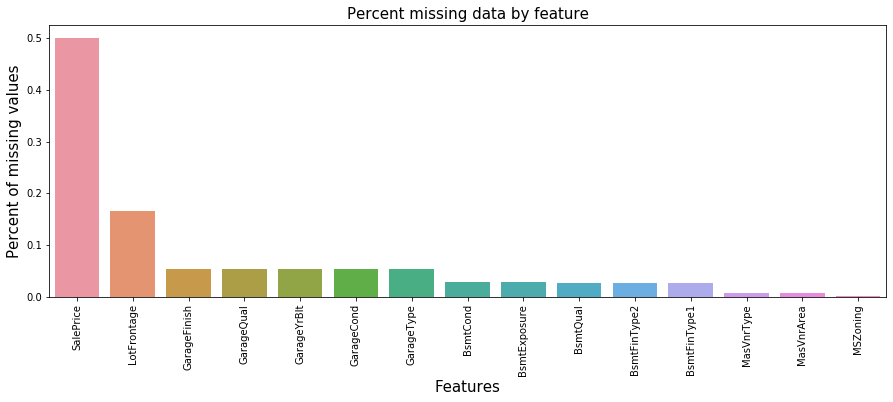

In [17]:
# Check for missing data

total = df_temp.isnull().sum().sort_values(ascending=False)
percent = (df_temp.isnull().sum()/df_temp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.head(15)

f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

print(missing_data.index)

In [18]:
# Create a copy of the dataset

data = df_temp.copy()

# Replace missing values in LotFrontage column with the median of the neighborhood

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['LotFrontage'].isnull().sum()

# Replace missing values in numerical columns with 0

for col in data[num_data.columns]:
    data[col] = data[col].fillna(0)

#Replace missing values in categorical columns with 'None'

for col in data[cat_data.columns]:
    data[col] = data[col].fillna('None')
    
print(data.isnull().sum())

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
GarageCond          0
GarageFinish        0
GarageQual          0
GarageType          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         0
LandContour         0
LandSlope           0
LotArea             0
LotConfig 

Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'HalfBath', 'MasVnrArea',
       'BsmtFullBath', '2ndFlrSF', 'WoodDeckSF', 'Fireplaces', 'OpenPorchSF',
       'BsmtFinSF1', 'BsmtUnfSF', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')


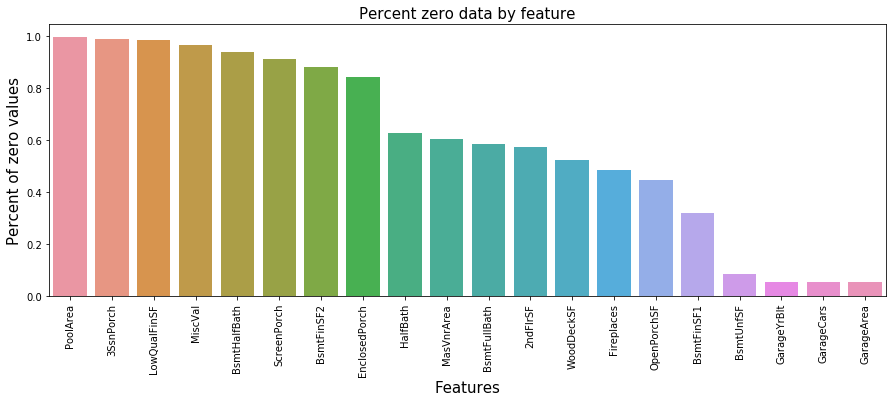

In [19]:
# Check the proportion of zero values in numerical features

zeros = data[data == 0].count(axis=0)/len(data.index)
zeros = zeros.sort_values(ascending=False).head(20)

f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=zeros.index, y=zeros)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of zero values', fontsize=15)
plt.title('Percent zero data by feature', fontsize=15)

print(zeros.index)

Index(['MasVnrType', 'GarageQual', 'GarageFinish', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'],
      dtype='object')


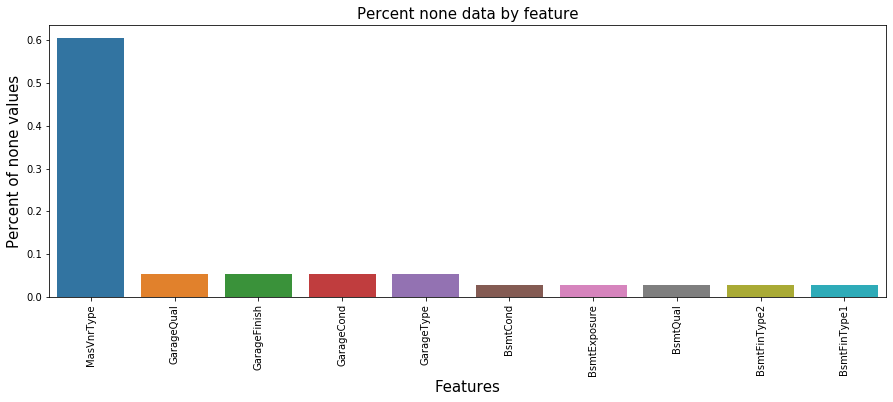

In [20]:
# Check the proportion of 'None' values in categorical features

none = data[data == 'None'].count(axis=0)/len(data.index)
none = none.sort_values(ascending=False).head(10)

f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=none.index, y=none)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of none values', fontsize=15)
plt.title('Percent none data by feature', fontsize=15)

print(none.index)

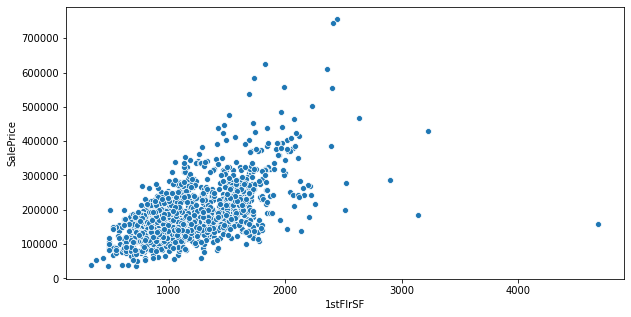

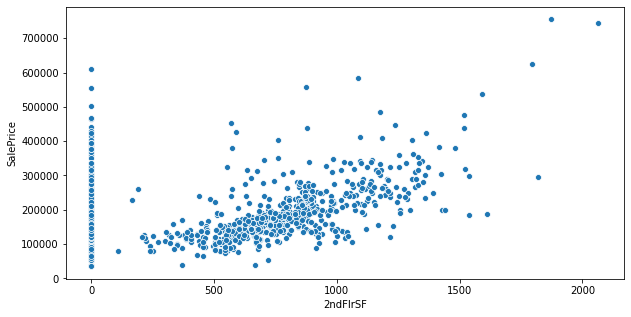

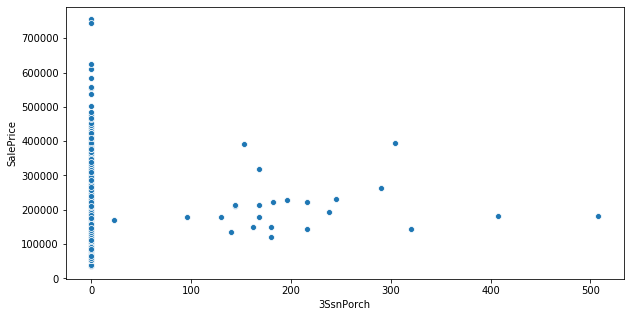

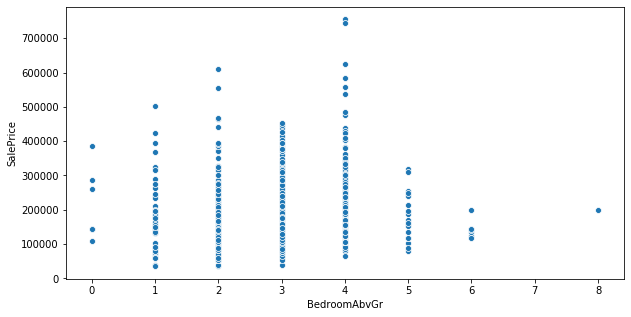

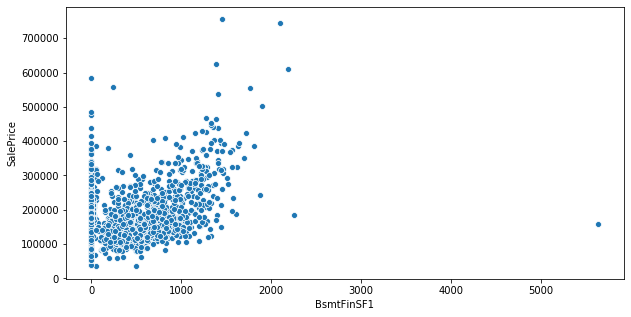

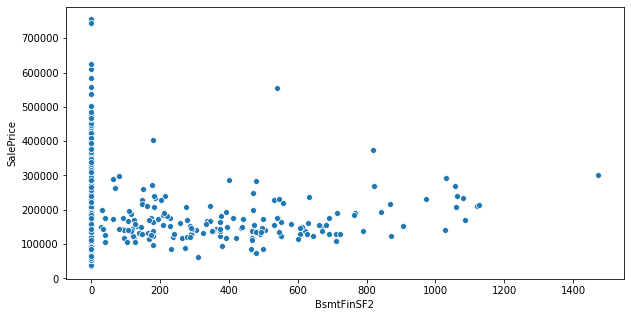

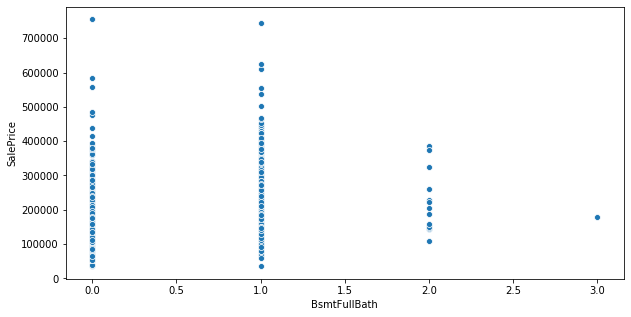

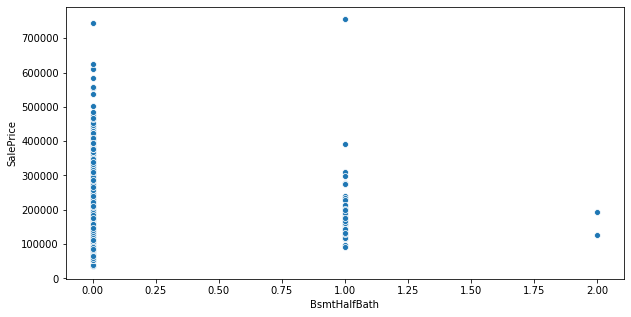

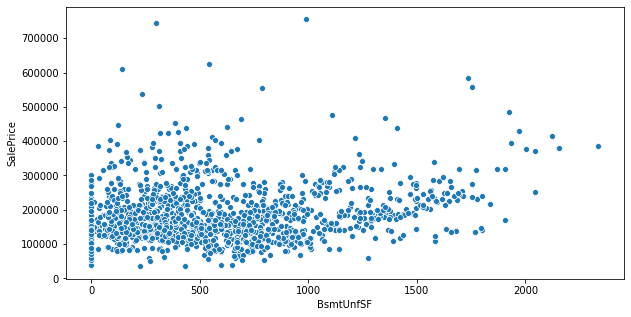

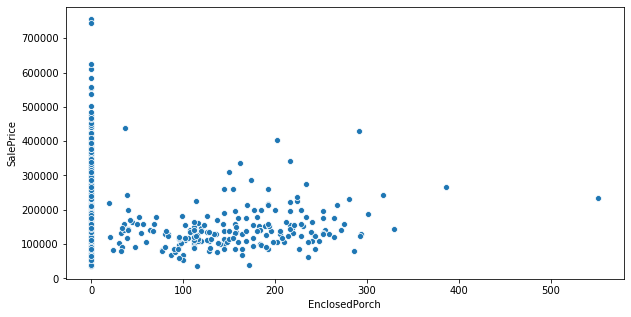

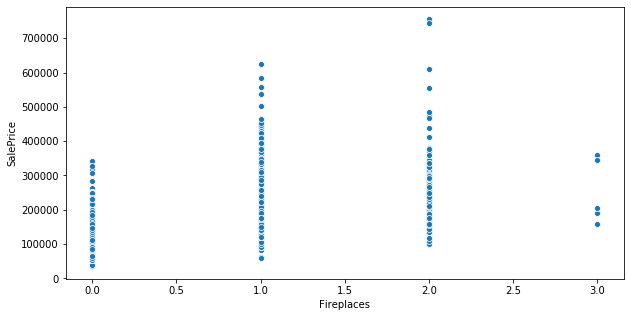

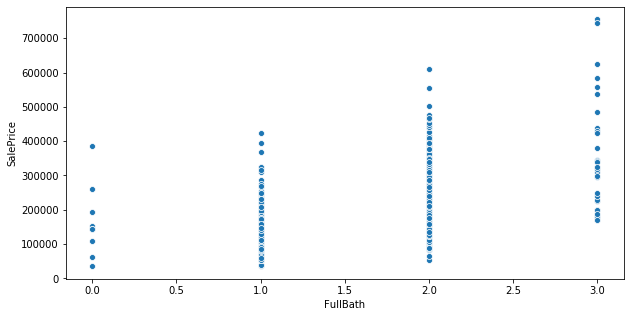

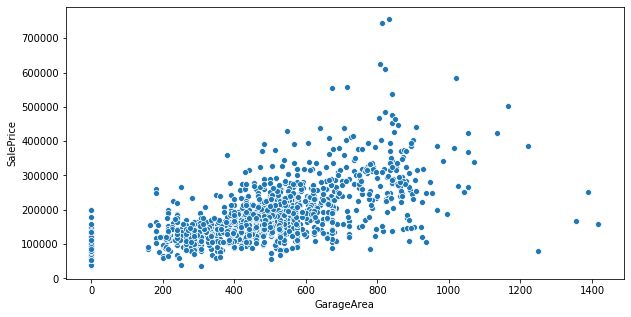

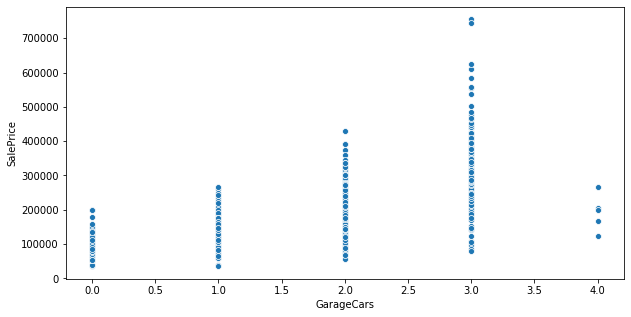

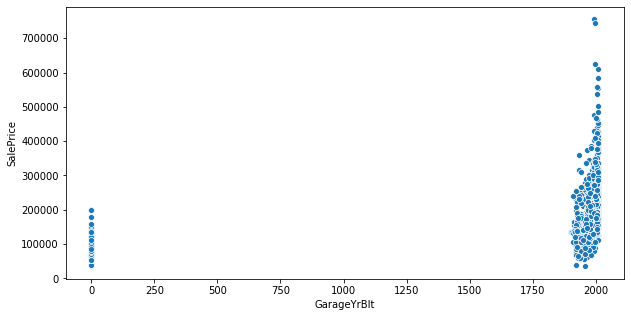

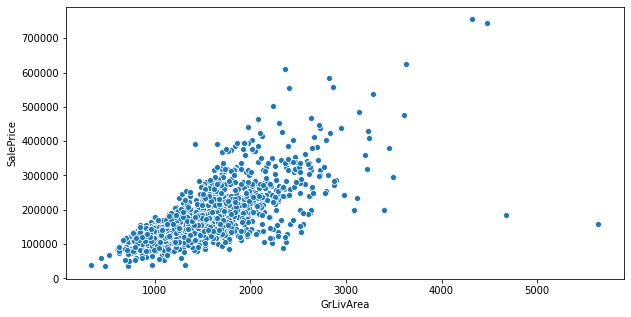

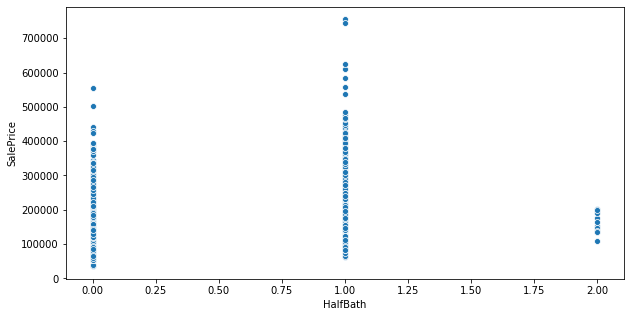

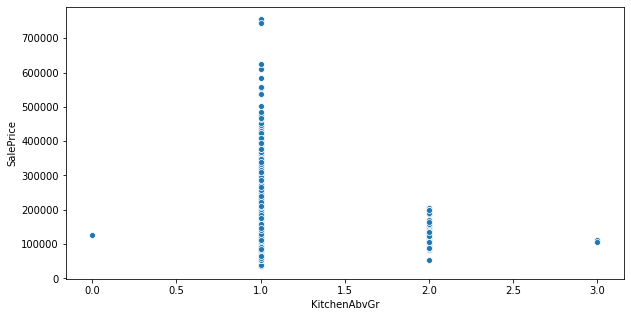

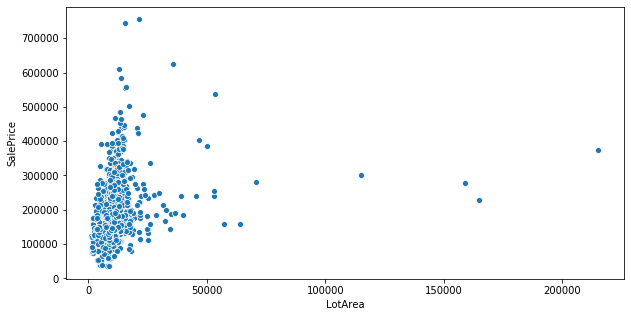

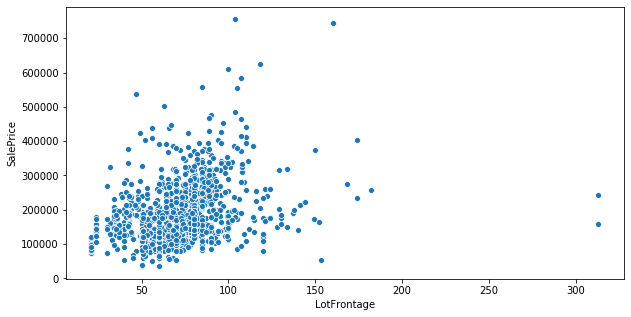

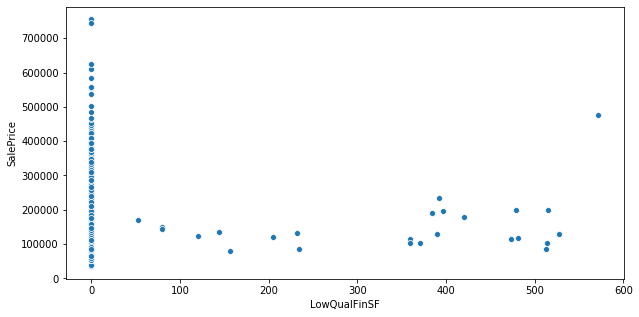

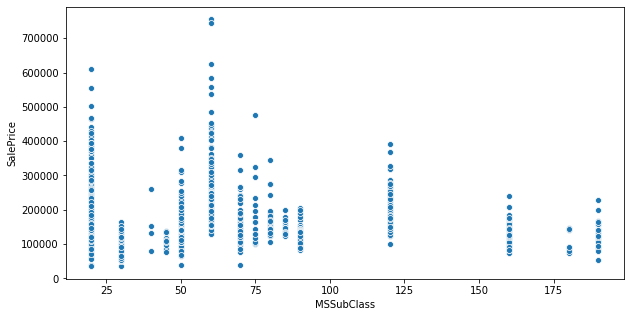

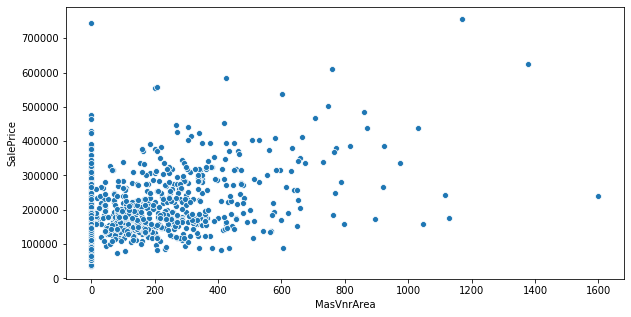

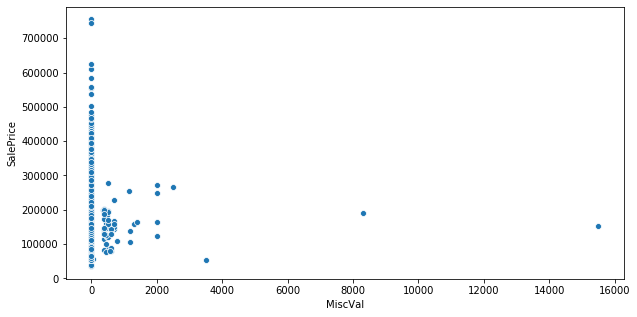

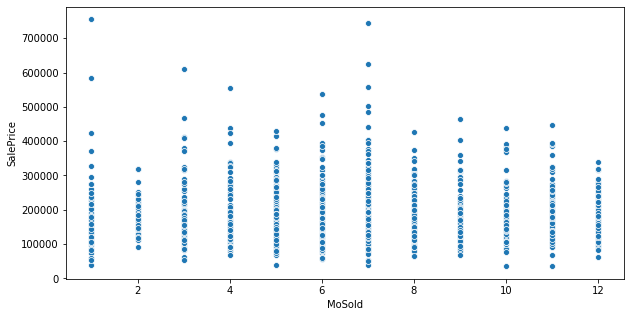

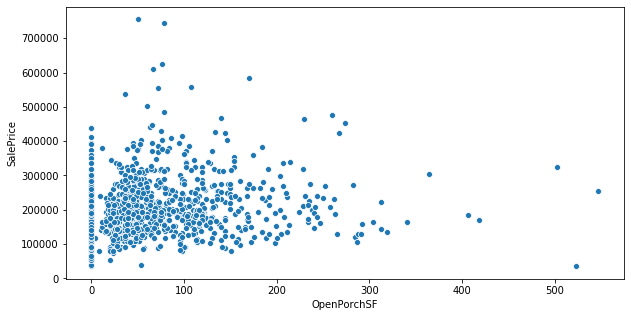

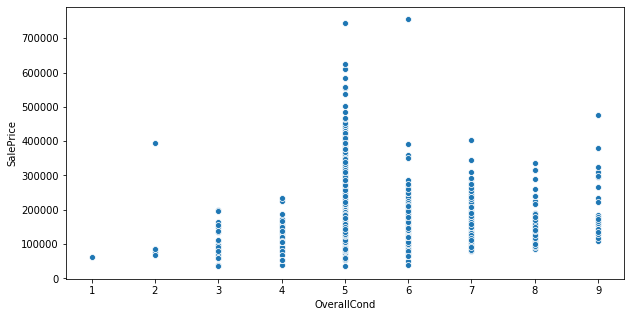

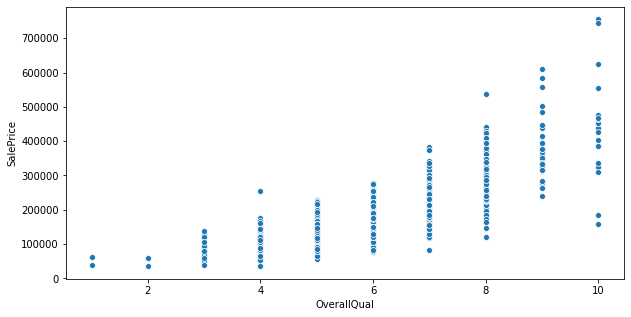

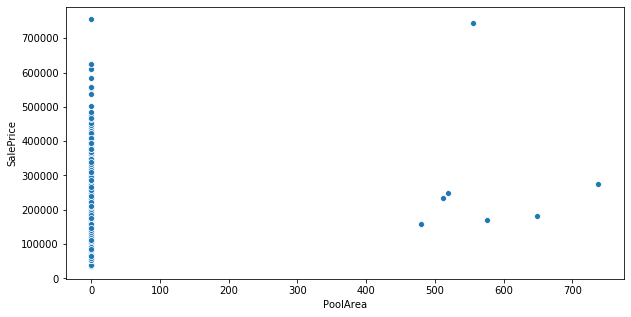

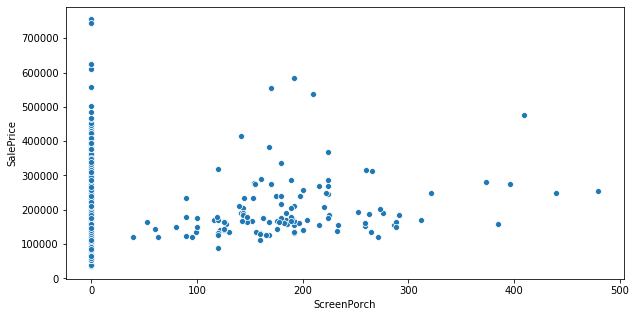

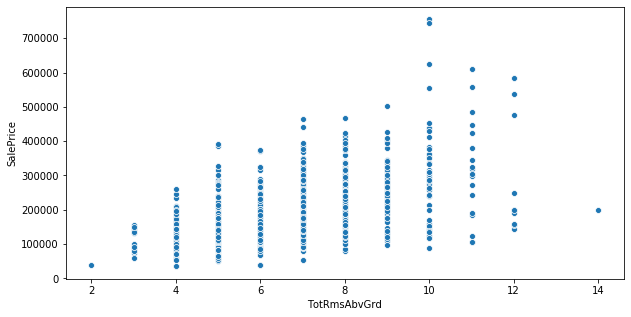

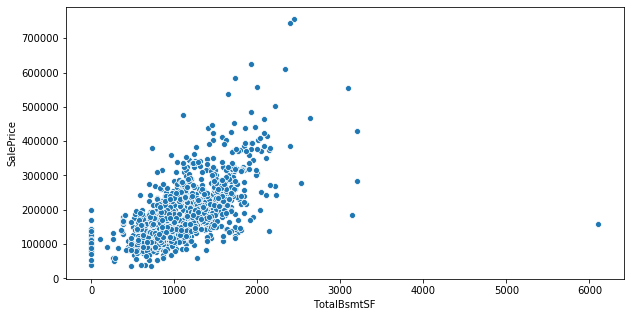

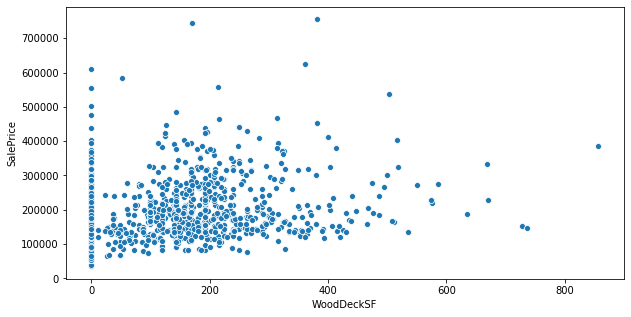

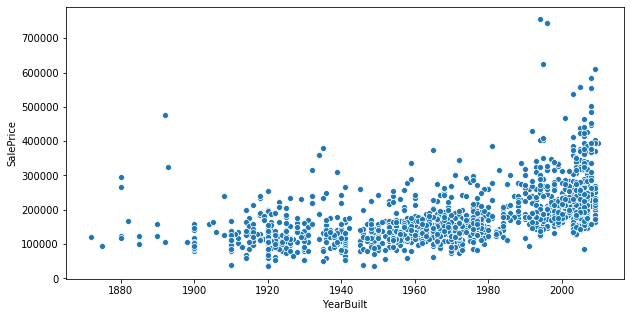

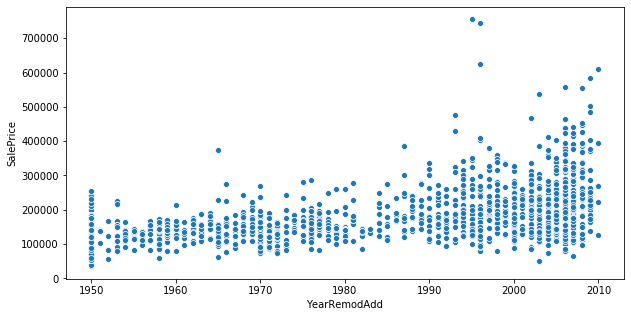

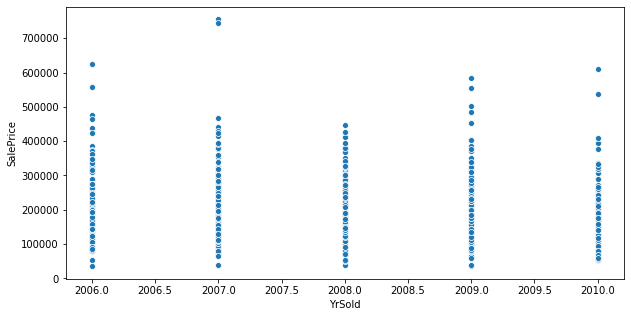

In [21]:
# Create scatter plots of all numerical features

for i, col in enumerate(num_data.columns):
    plt.figure(i, figsize=(10, 5))
    sns.scatterplot(x=data[col], y='SalePrice', data=data)

In [22]:
data.shape

(2919, 75)

In [24]:
# Remove Outliers

data['1stFlrSF'] = np.where(data['1stFlrSF']>4000, float(data['1stFlrSF'].median()), data['1stFlrSF'])
data['BedroomAbvGr'] = np.where(data['BedroomAbvGr']>7, float(data['BedroomAbvGr'].median()), data['BedroomAbvGr'])
data['KitchenAbvGr'] = np.where(data['KitchenAbvGr']>2, float(data['KitchenAbvGr'].median()), data['KitchenAbvGr'])
data['TotRmsAbvGrd'] = np.where(data['TotRmsAbvGrd']>12, float(data['TotRmsAbvGrd'].median()), data['TotRmsAbvGrd'])
data['TotalBsmtSF'] = np.where(data['TotalBsmtSF']>4000, float(data['TotalBsmtSF'].median()), data['TotalBsmtSF'])
data['LotArea'] = np.where(data['LotArea']>100000, float(data['LotArea'].median()), data['LotArea'])
data['LotFrontage'] = np.where(data['LotFrontage']>200, float(data['LotFrontage'].median()), data['LotFrontage'])
data['GrLivArea'] = np.where(data['GrLivArea']>4000, float(data['GrLivArea'].median()), data['GrLivArea'])
data['1stFlrSF'] = np.where(data['1stFlrSF']>4000, float(data['1stFlrSF'].median()), data['1stFlrSF'])

#data = data.drop(data[data['SalePrice']>700000].index)

In [25]:
data.shape

(2919, 75)

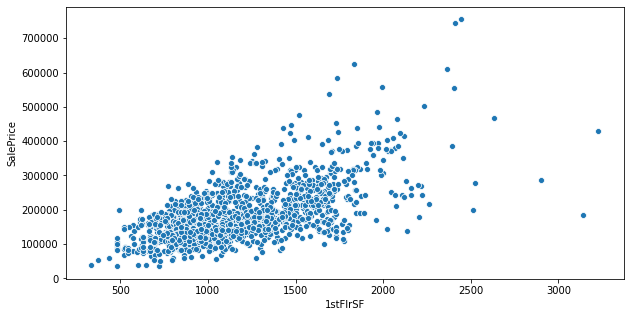

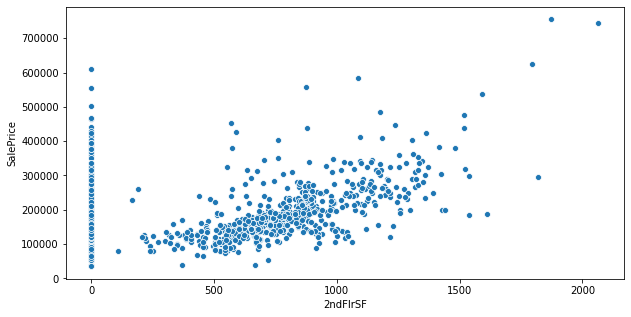

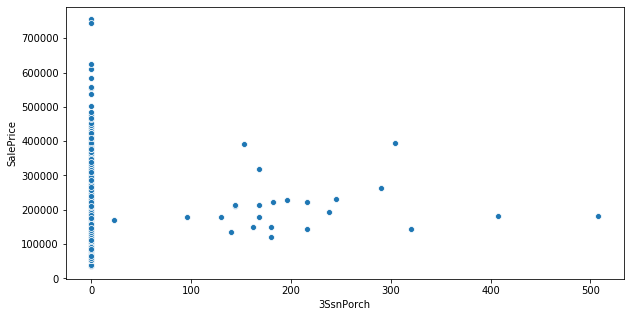

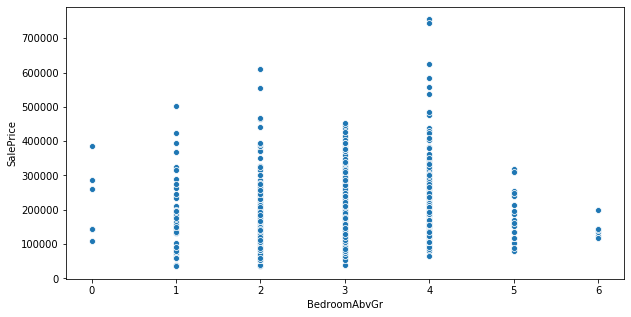

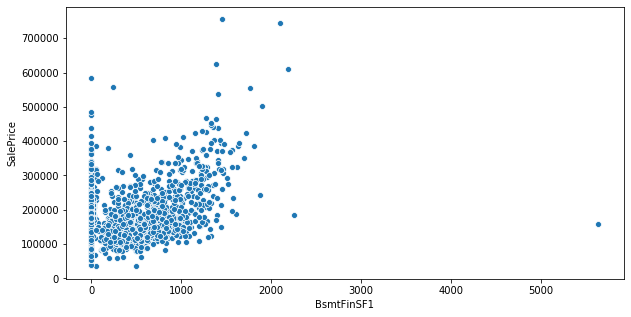

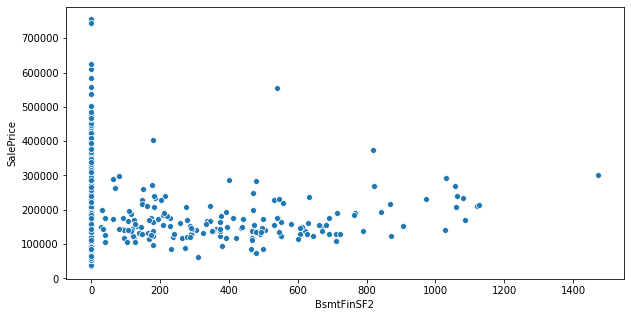

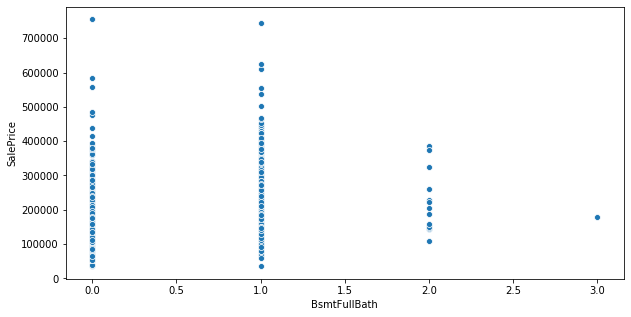

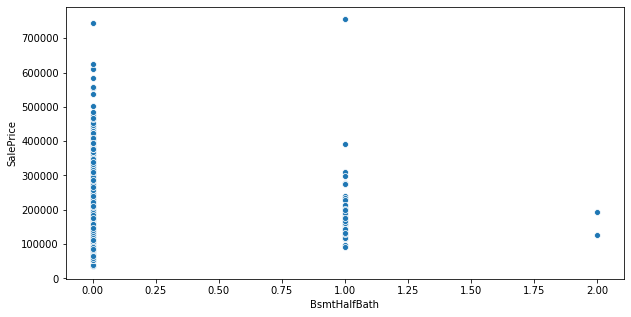

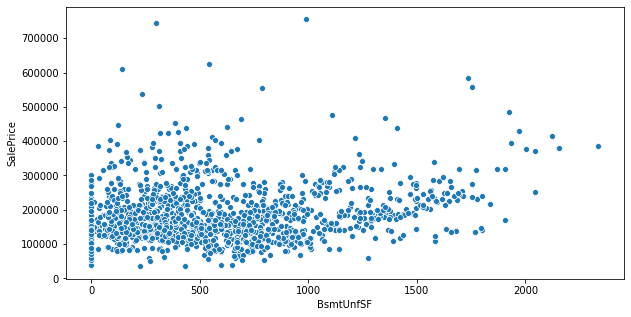

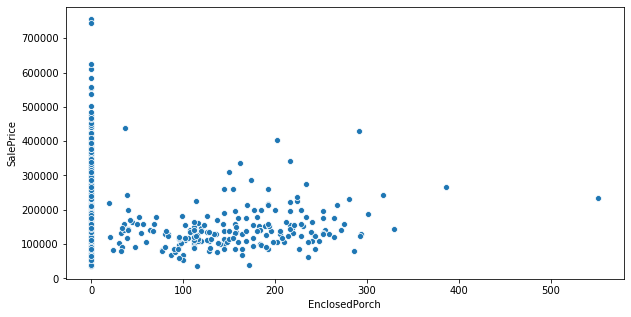

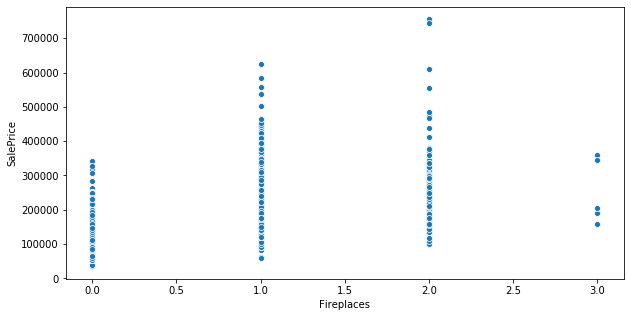

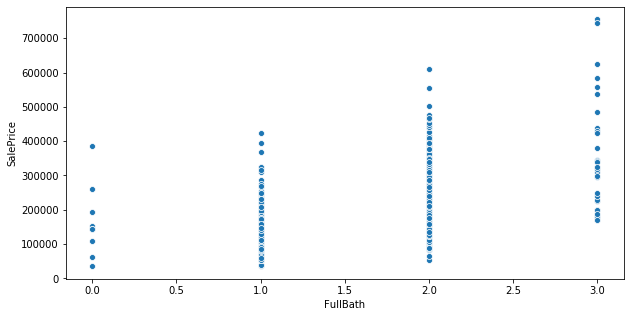

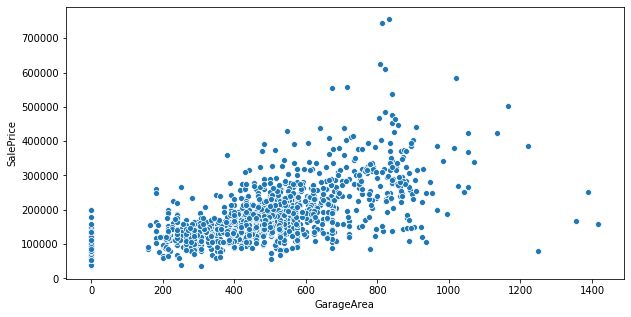

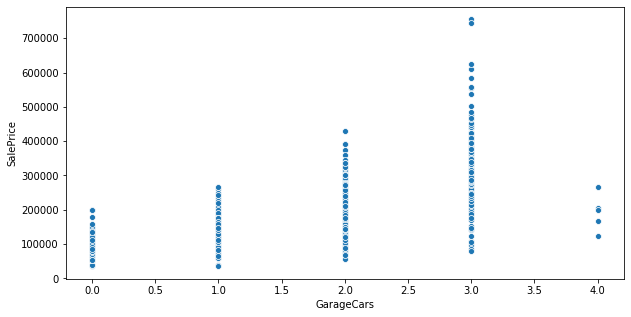

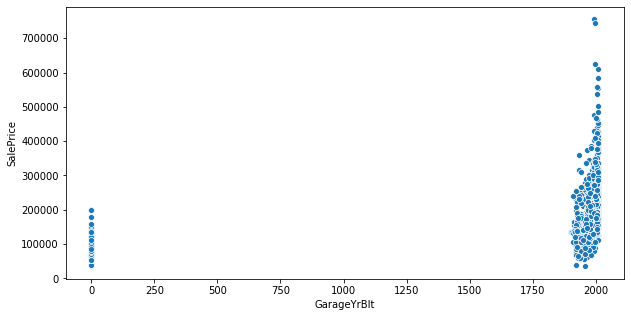

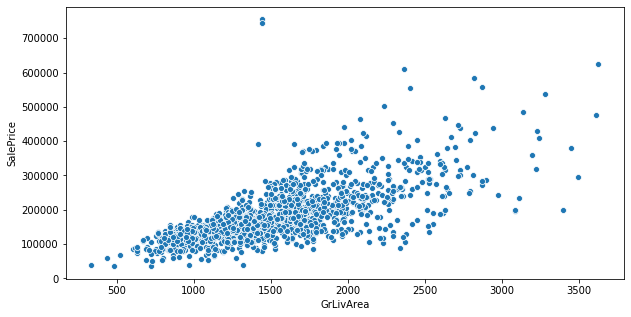

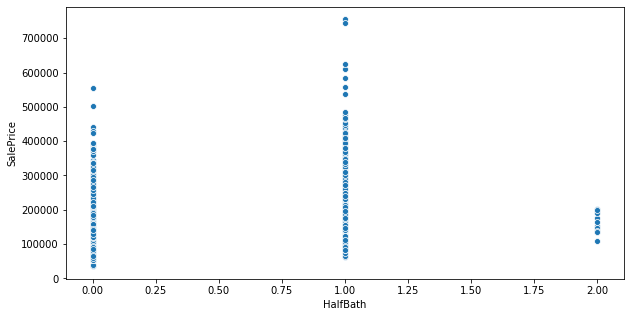

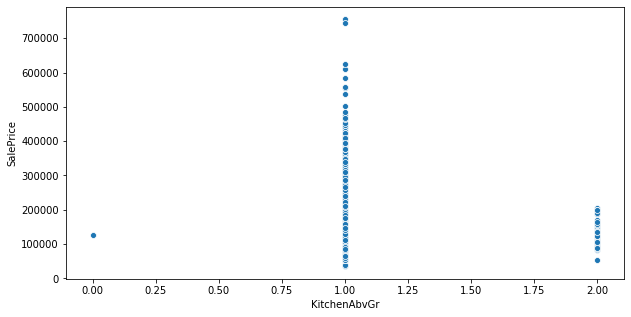

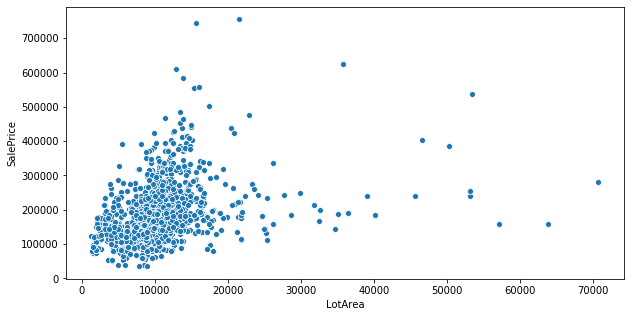

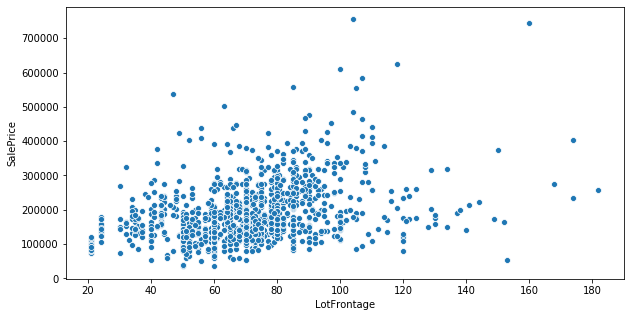

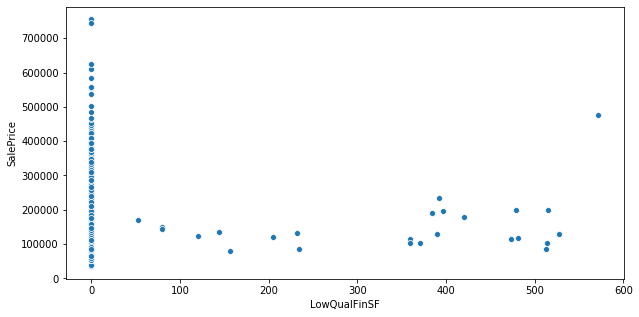

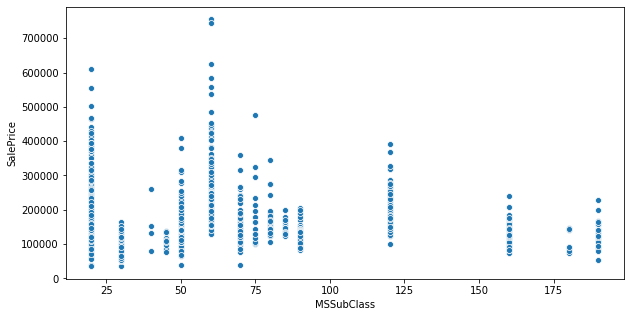

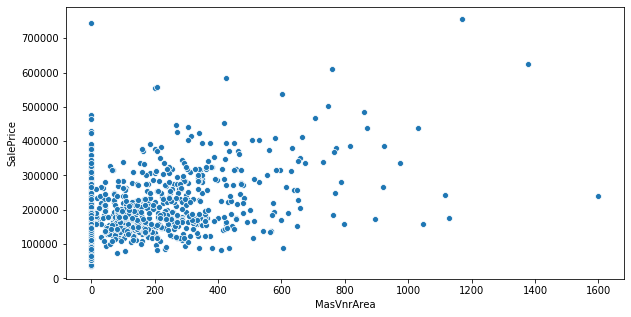

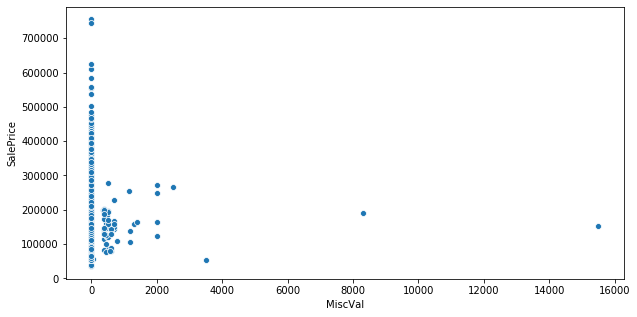

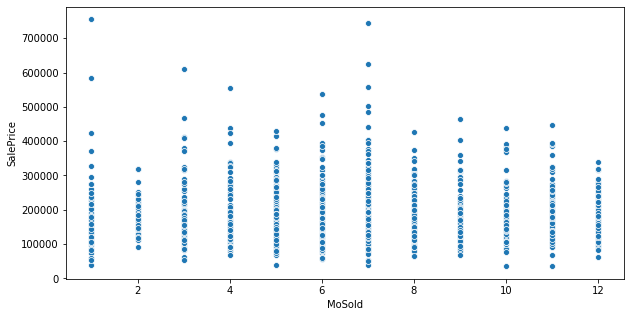

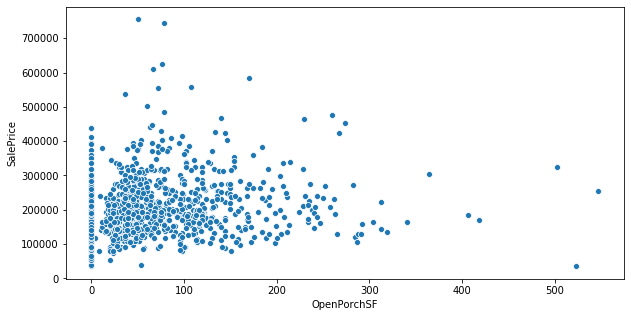

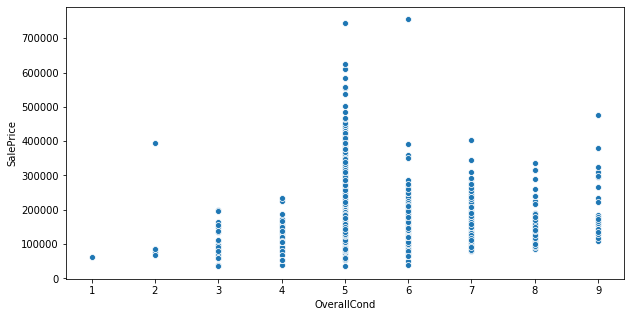

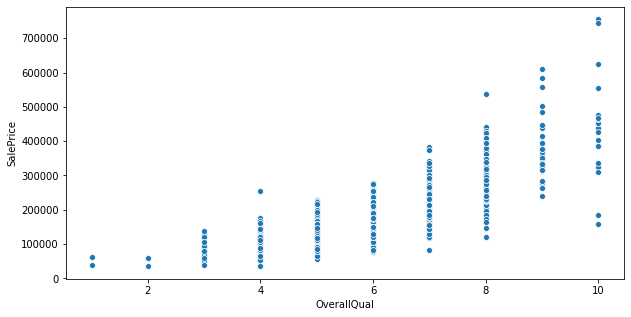

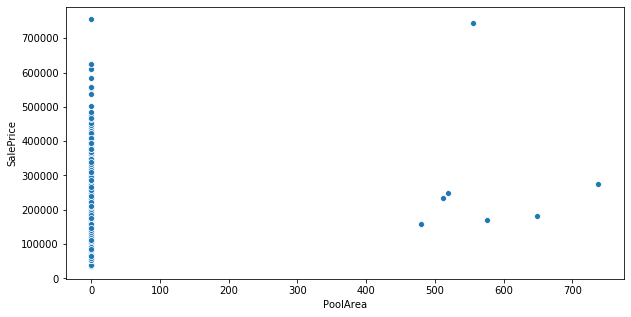

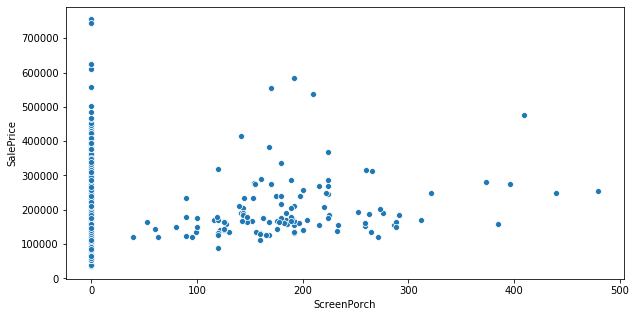

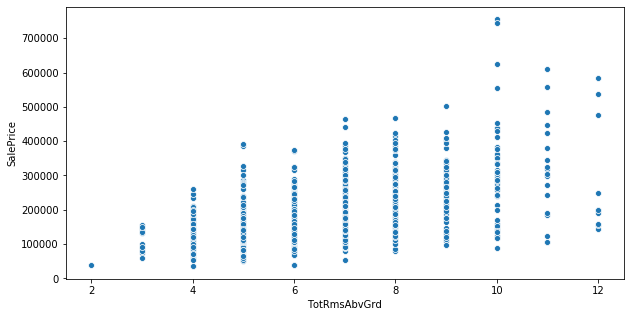

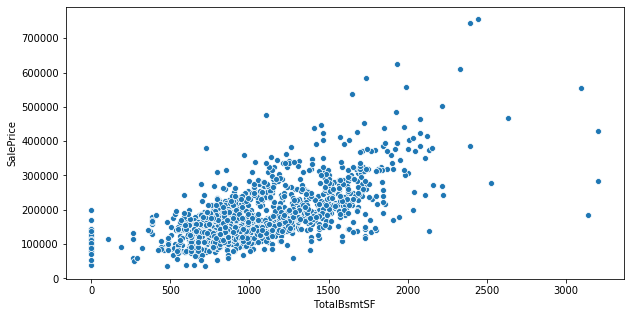

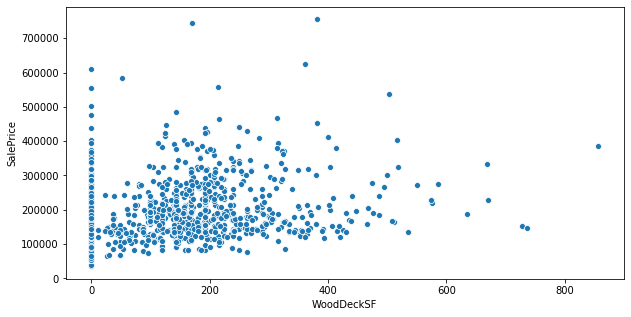

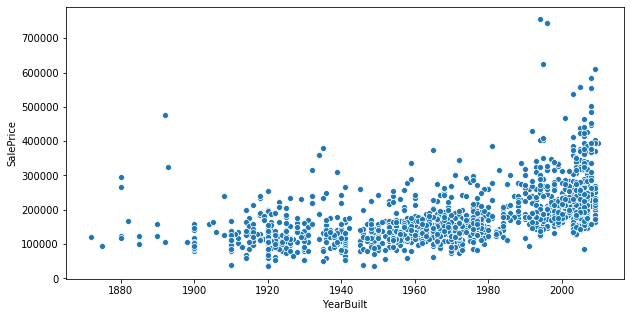

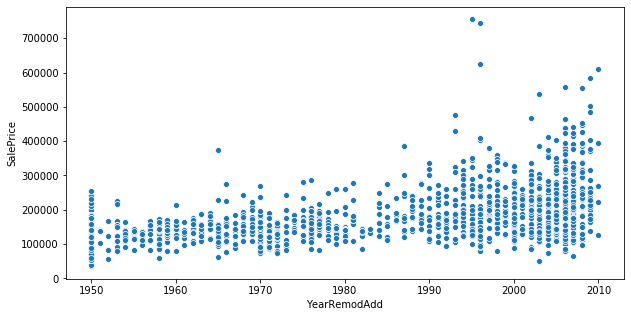

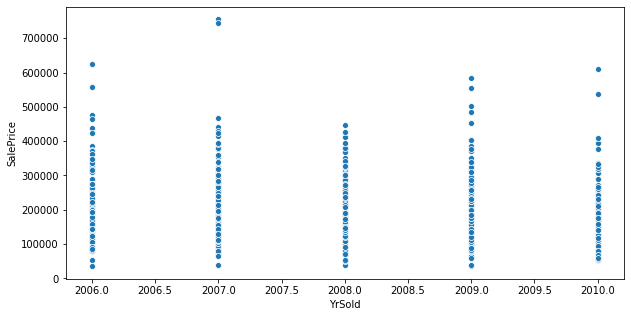

In [26]:
# Create scatter plots of all numerical features

for i, col in enumerate(num_data.columns):
    plt.figure(i, figsize=(10, 5))
    sns.scatterplot(x=data[col], y='SalePrice', data=data)

In [27]:
# Add new features of interest

data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [28]:
# Remove unecessary features

drop_columns = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal',
       'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'MasVnrArea', 
       '2ndFlrSF', 'WoodDeckSF', 'Fireplaces', 'OpenPorchSF', 'TotalBsmtSF',
       'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'MasVnrType']

data = data.drop(columns=drop_columns)

print(data.shape)
print(data.columns)
data.head()

(2919, 63)
Index(['1stFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GrLivArea', 'HalfBath', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'MSSubClass', 'MSZoning', 'MoSold', 'Neighborhood', 'OverallCond',
       'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePrice', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'haspool', 'has2ndfloor',
       'hasgarage', 'hasbsmt', 'hasfireplace', 'TotalSF'],
      dtype='object')


,1stFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MoSold,Neighborhood,OverallCond,OverallQual,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,TotRmsAbvGrd,Utilities,YearBuilt,YearRemodAdd,YrSold,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,TotalSF
0,856.0,3.0,1Fam,TA,No,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,1710.0,1,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,60,RL,2,CollgCr,5,7,Y,CompShg,Gable,Normal,208500.0,WD,Pave,8.0,AllPub,2003,2003,2008,0,1,1,1,0,2566.0
1,1262.0,3.0,1Fam,TA,Gd,ALQ,Unf,0.0,1.0,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,2,Typ,2.0,TA,RFn,TA,Attchd,1262.0,0,GasA,Ex,1Story,1.0,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,20,RL,5,Veenker,8,6,Y,CompShg,Gable,Normal,181500.0,WD,Pave,6.0,AllPub,1976,1976,2007,0,0,1,1,1,2524.0
2,920.0,3.0,1Fam,TA,Mn,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,1786.0,1,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,60,RL,9,CollgCr,5,7,Y,CompShg,Gable,Normal,223500.0,WD,Pave,6.0,AllPub,2001,2002,2008,0,1,1,1,1,2706.0
3,961.0,3.0,1Fam,Gd,No,ALQ,Unf,1.0,0.0,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,1,Typ,3.0,TA,Unf,TA,Detchd,1717.0,0,GasA,Gd,2Story,1.0,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,70,RL,2,Crawfor,5,7,Y,CompShg,Gable,Abnorml,140000.0,WD,Pave,7.0,AllPub,1915,1970,2006,0,1,1,1,1,2473.0
4,1145.0,4.0,1Fam,TA,Av,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,2,Typ,3.0,TA,RFn,TA,Attchd,2198.0,1,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,60,RL,12,NoRidge,5,8,Y,CompShg,Gable,Normal,250000.0,WD,Pave,9.0,AllPub,2000,2000,2008,0,1,1,1,1,3343.0


In [29]:
# Split numerical and categorical data

cat_data = data.select_dtypes(include='object')
float_data = data.select_dtypes(include=['float64']).drop(columns='SalePrice')
int_data = data.select_dtypes(include=[int])
num_data = float_data + int_data

print(cat_data.shape)
print(cat_data.columns)
print('')
print(float_data.shape)
print(float_data.columns)
print('')
print(int_data.shape)
print(int_data.columns)
print('')
print(num_data.shape)
print(num_data.columns)
print('')
print(data.shape)

(2919, 37)
Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities'],
      dtype='object')

(2919, 11)
Index(['1stFlrSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'TotRmsAbvGrd', 'TotalSF'],
      dtype='object')

(2919, 14)
Index(['FullBath', 'HalfBath', 'MSSubClass', 'MoSold', 'OverallCond',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'haspool',
       'has2ndfloor', 'hasgarage', 'h

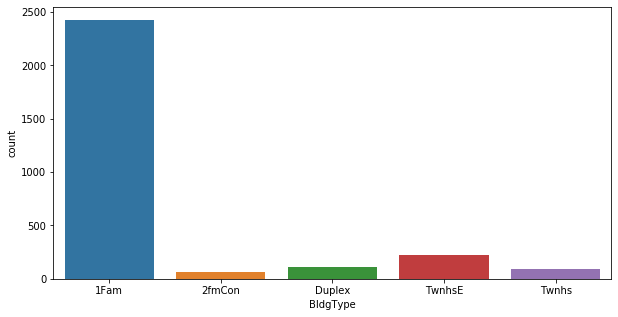

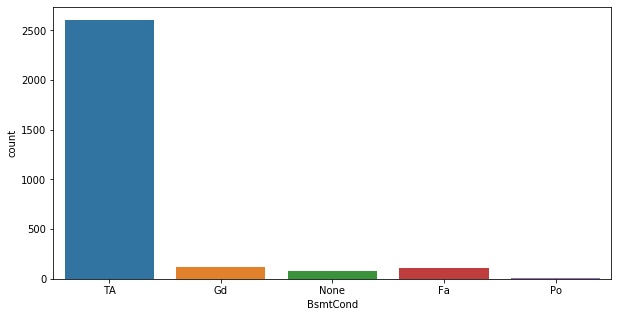

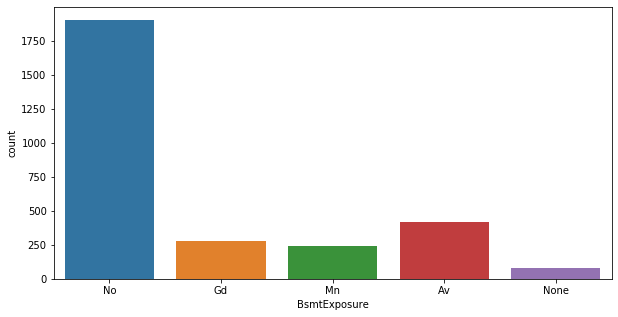

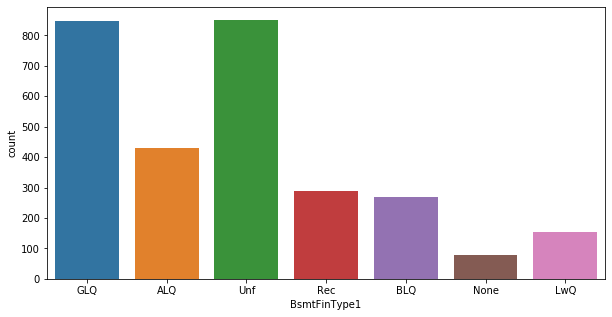

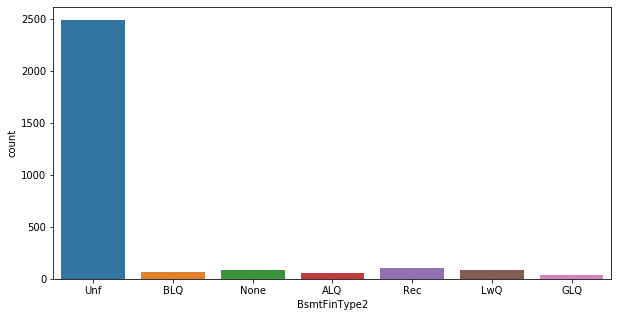

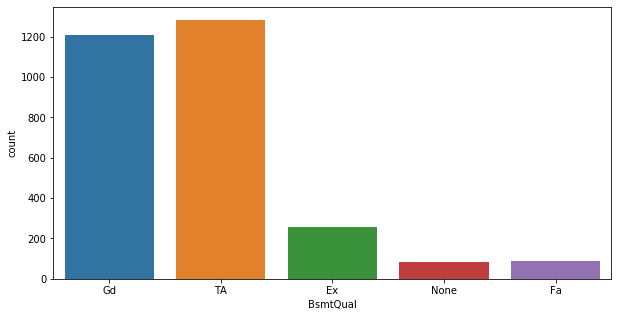

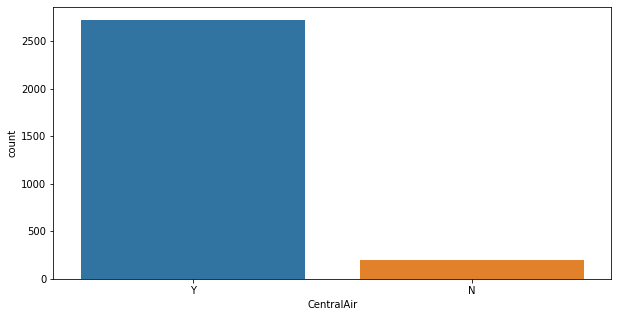

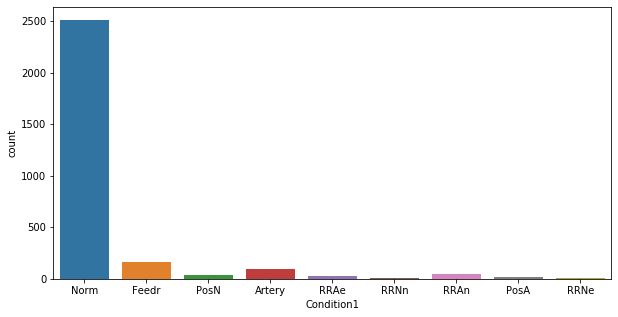

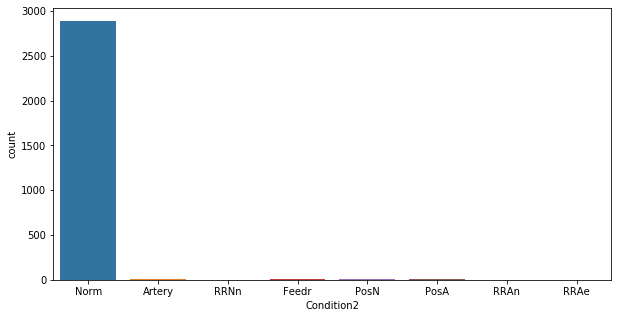

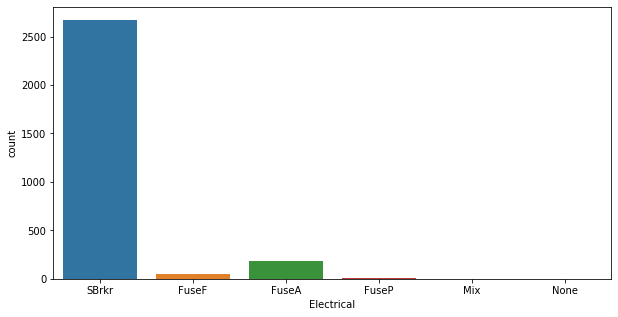

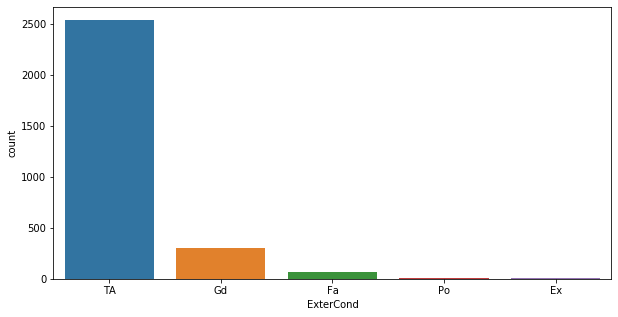

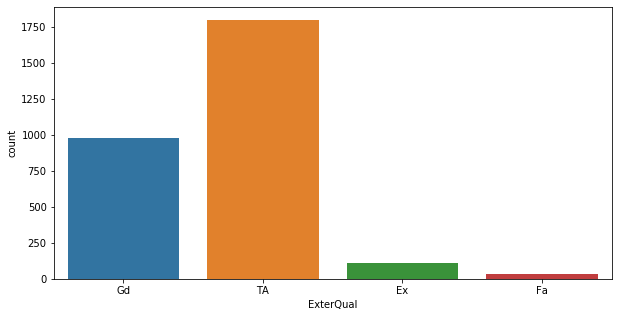

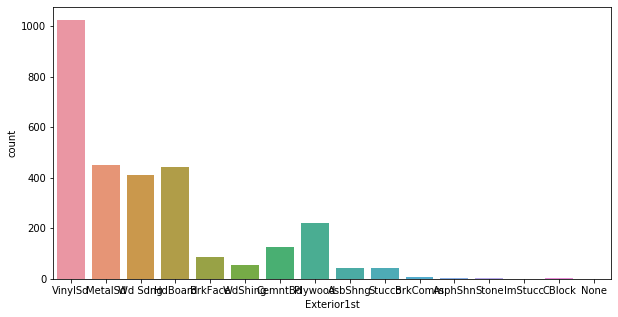

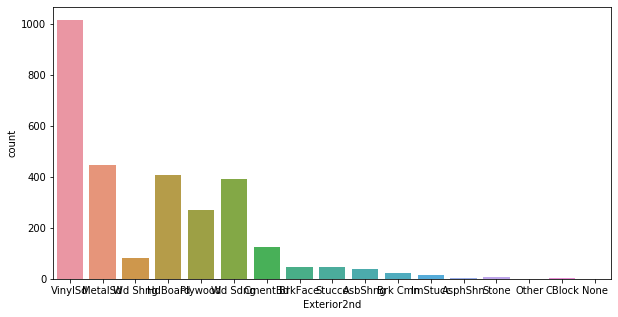

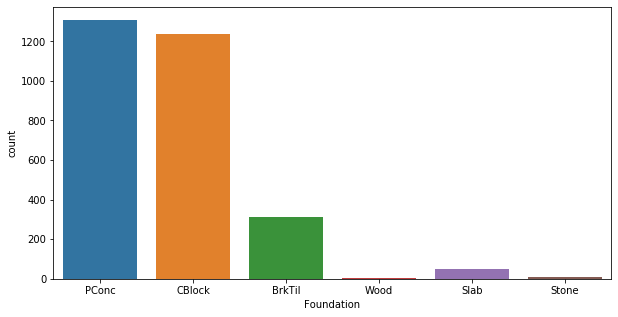

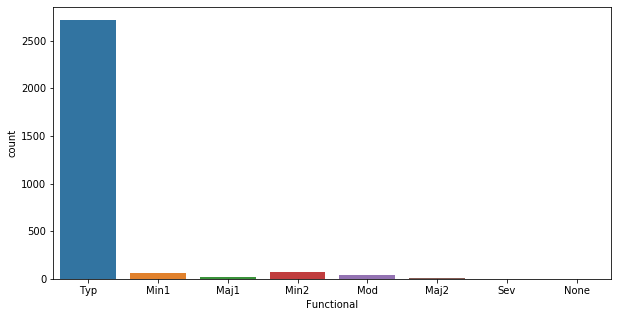

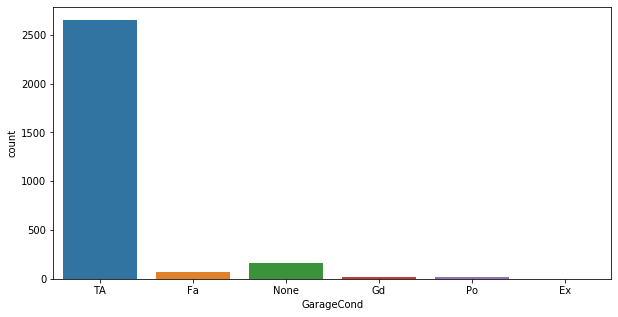

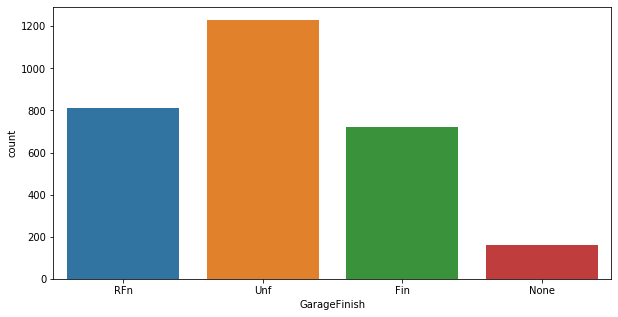

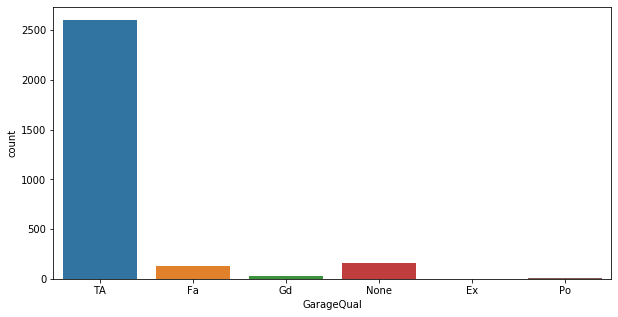

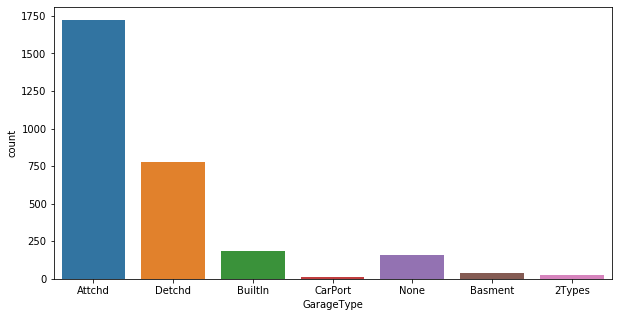

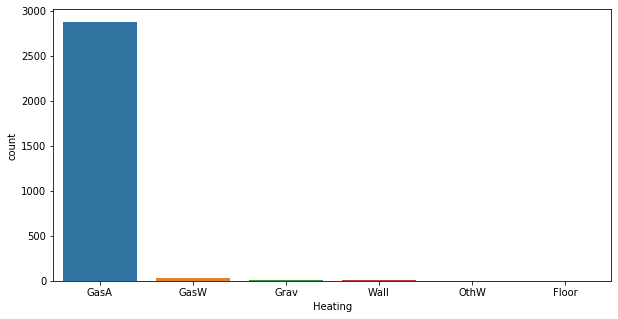

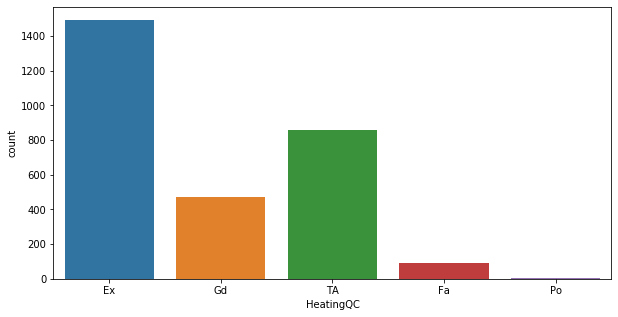

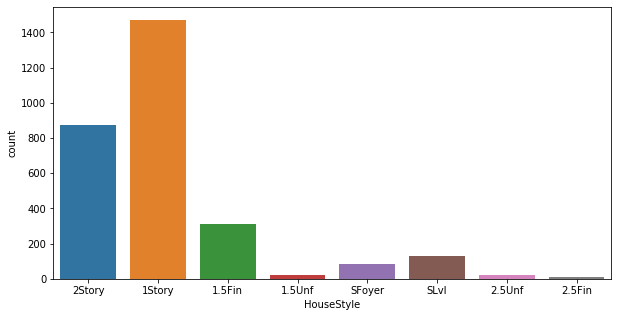

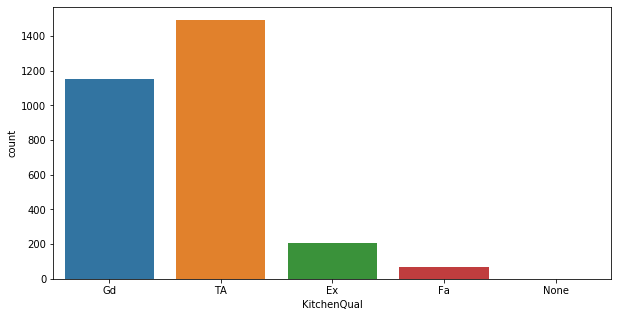

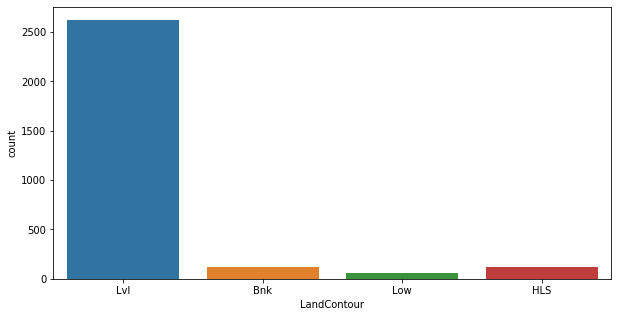

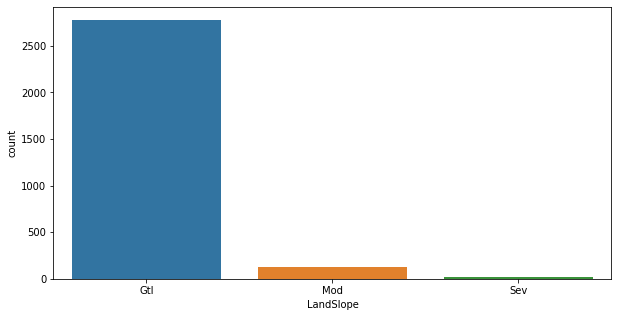

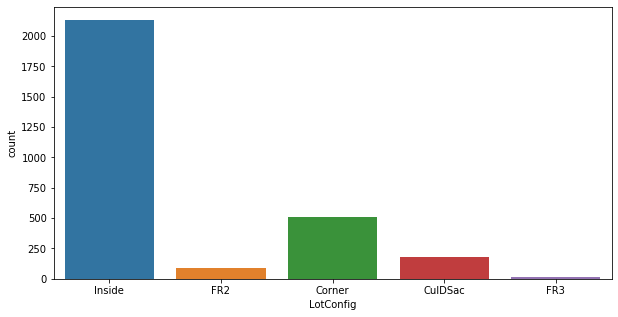

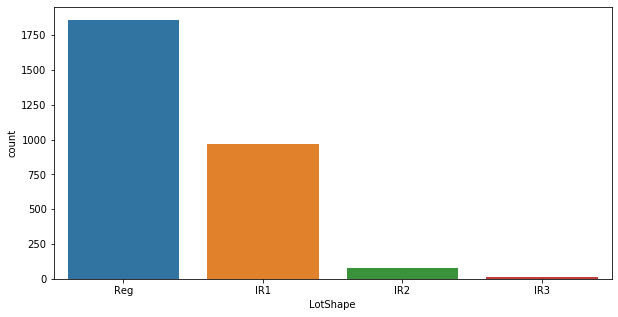

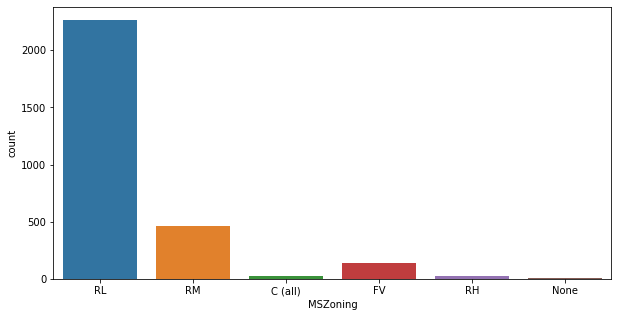

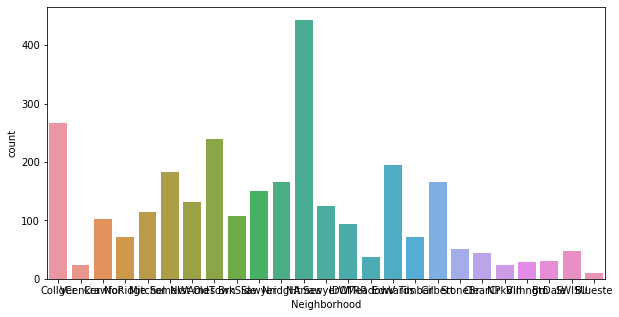

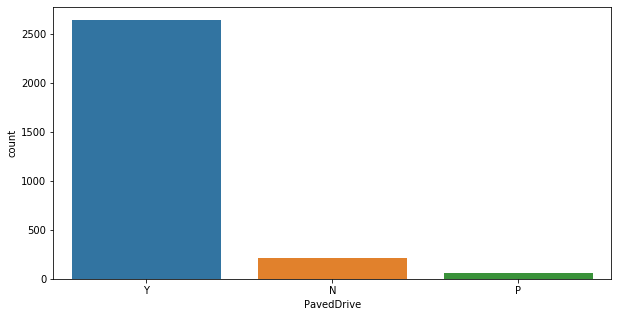

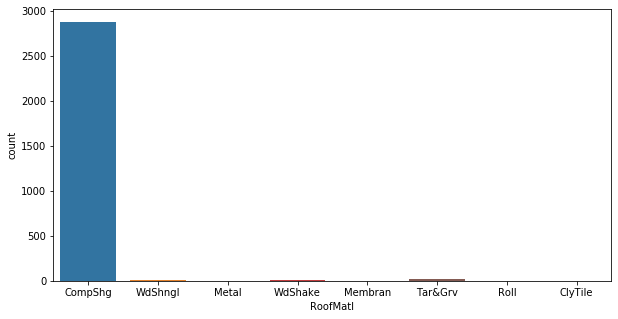

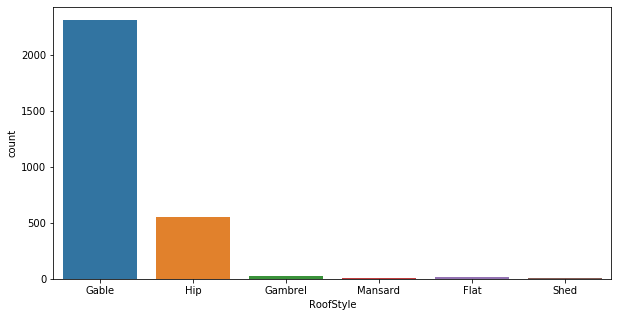

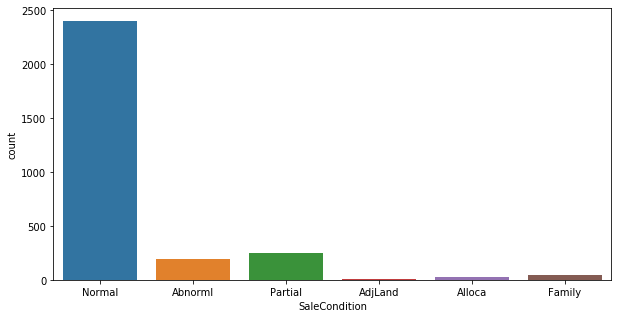

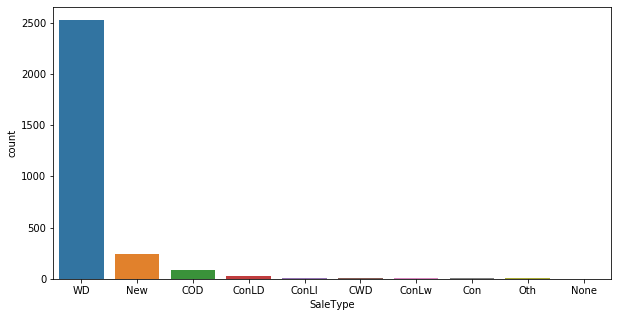

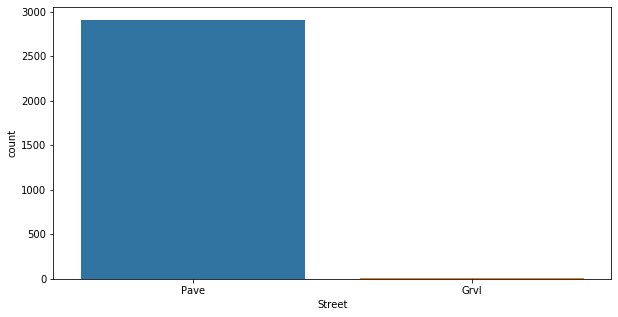

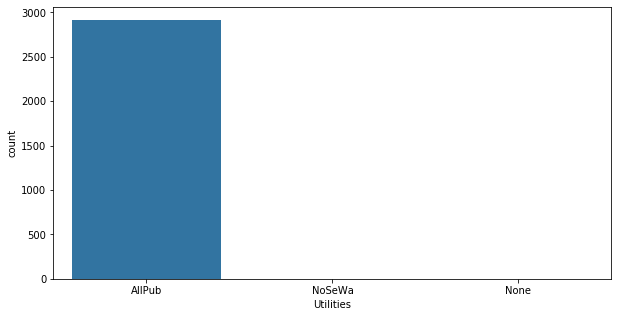

In [30]:
# Plot categorical data

for i, col in enumerate(cat_data.columns):
    plt.figure(i, figsize=(10, 5))
    sns.countplot(x=col, data=data)

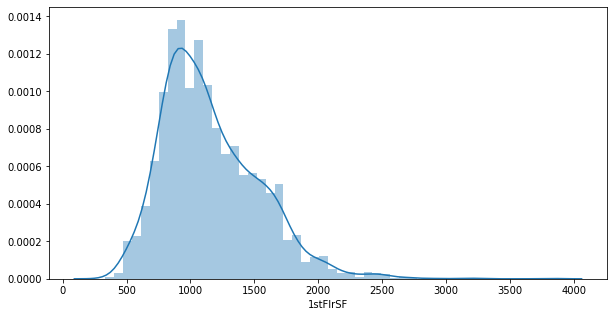

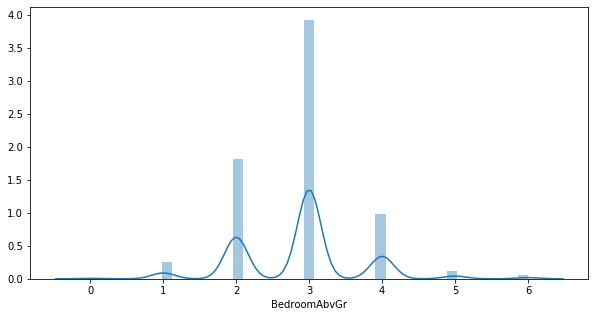

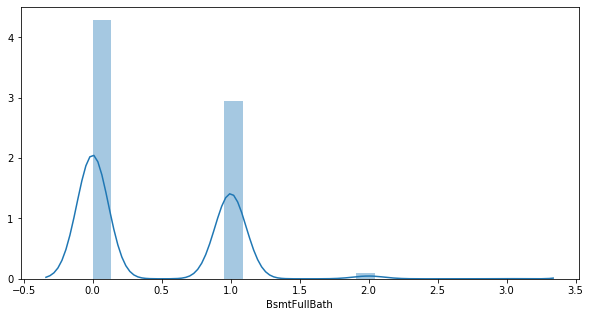

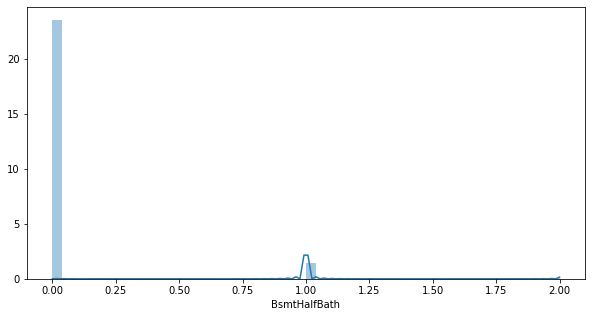

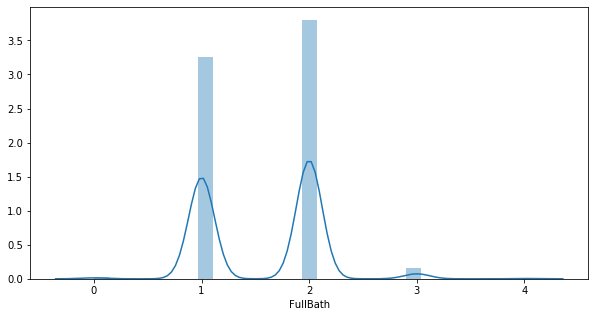

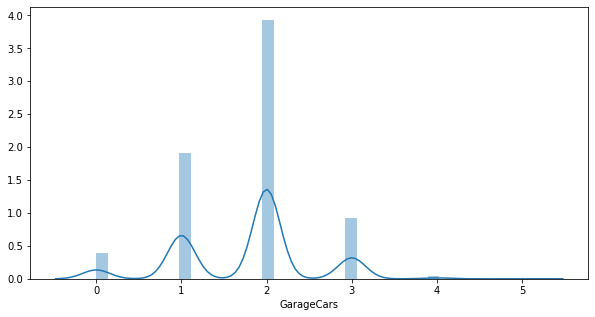

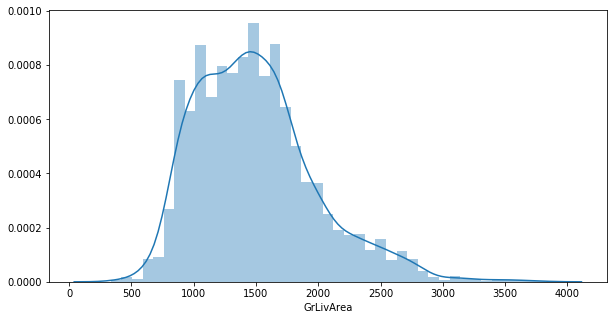

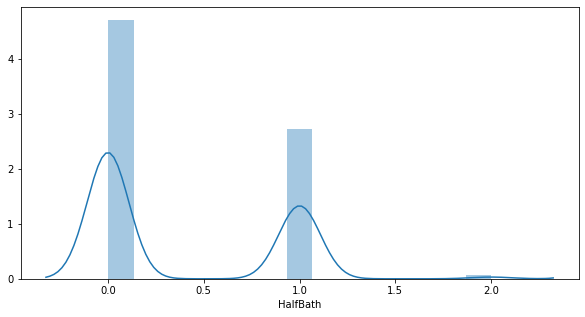

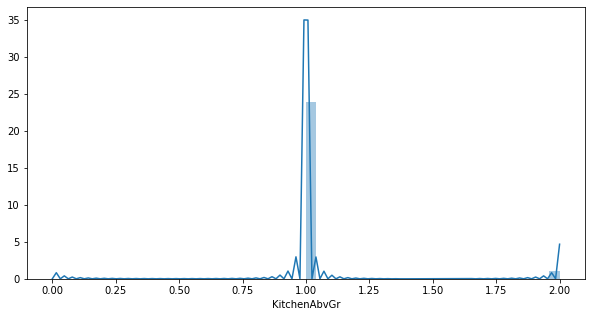

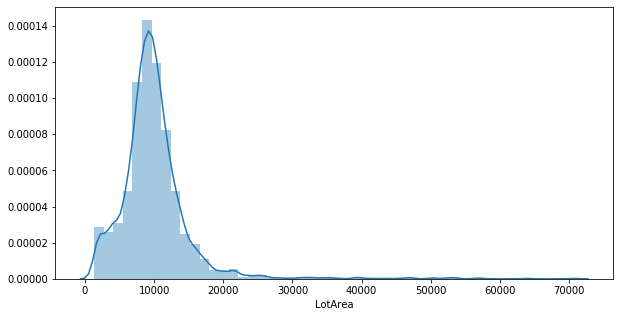

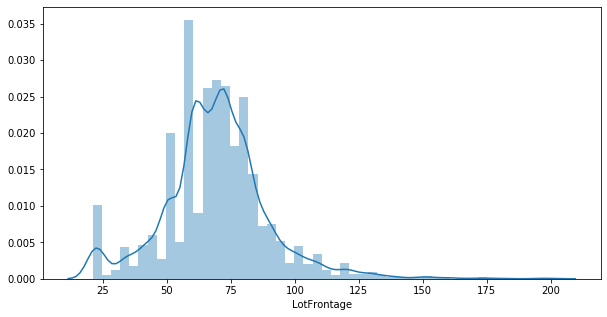

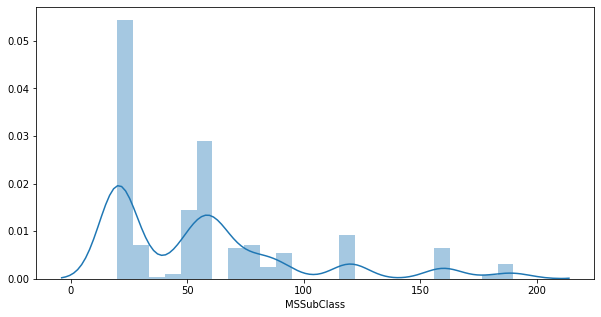

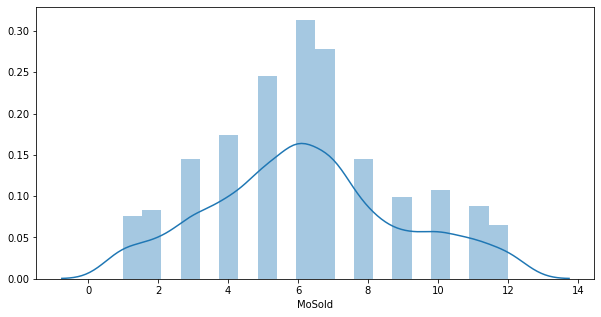

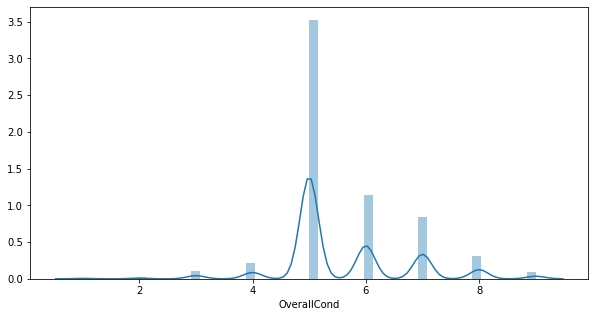

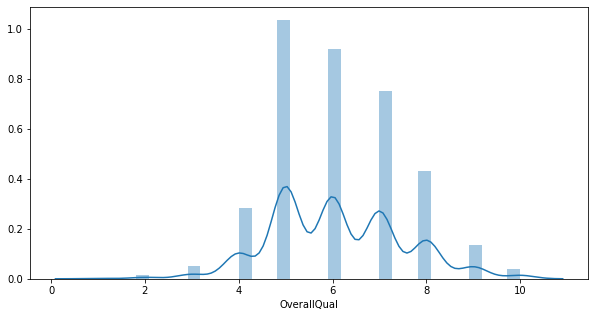

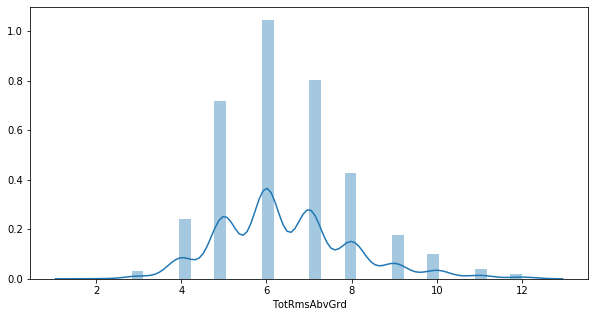

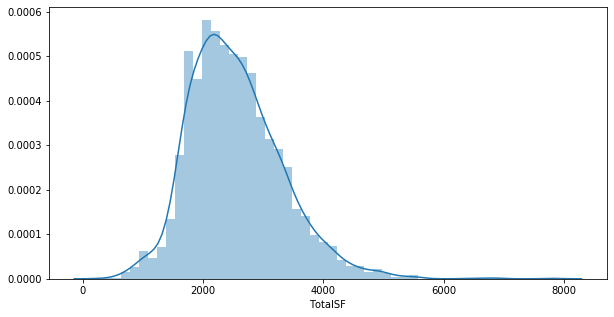

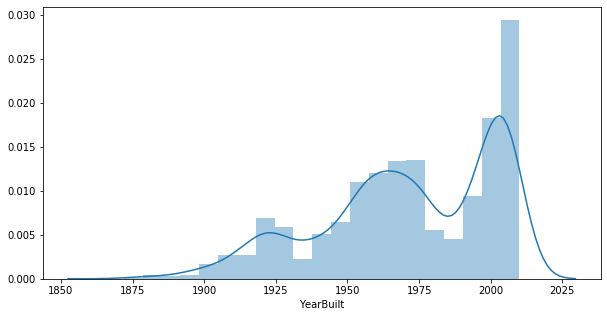

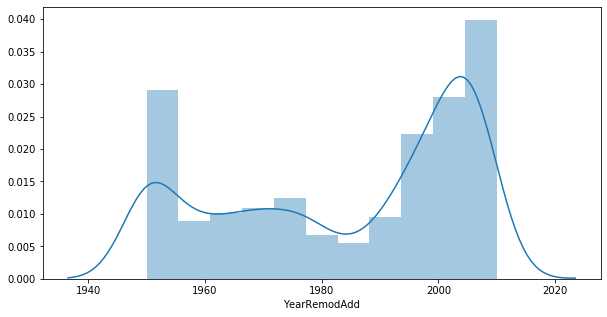

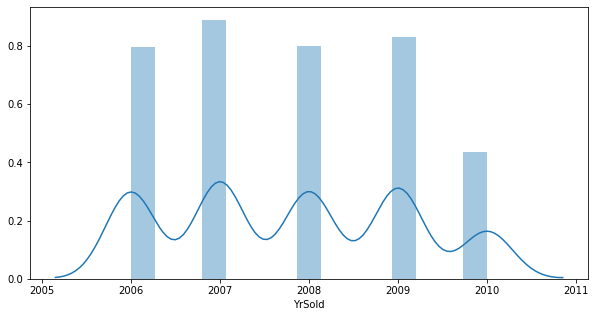

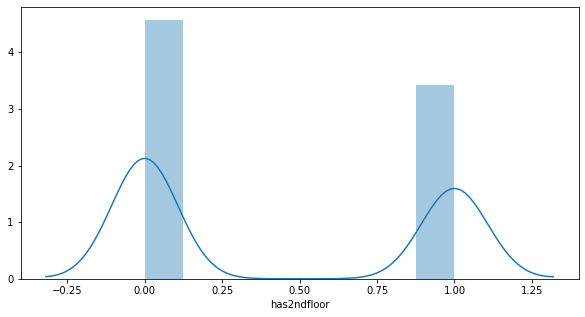

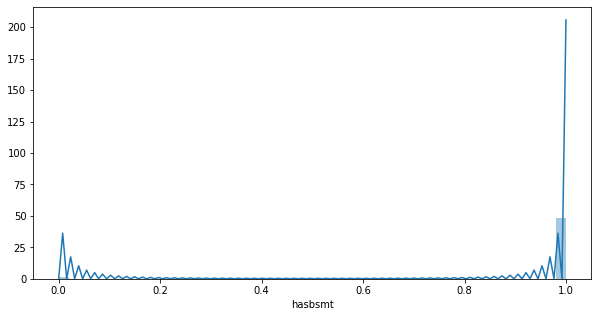

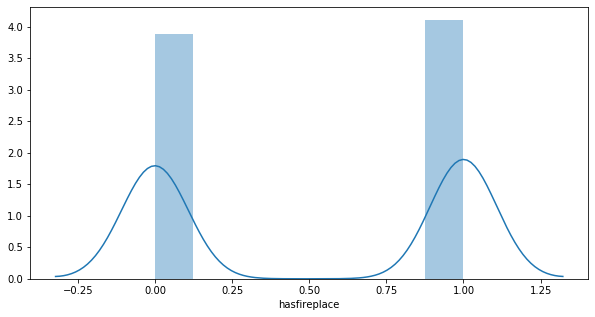

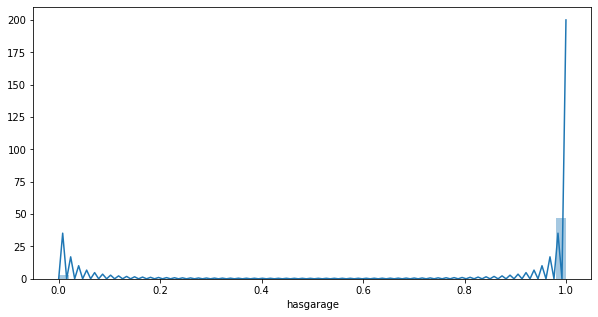

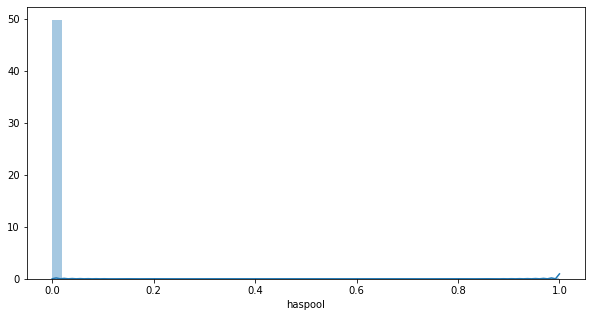

In [31]:
# Plot numerical data

for i, col in enumerate(num_data.columns):
    plt.figure(i, figsize=(10, 5))
    sns.distplot(data[col])

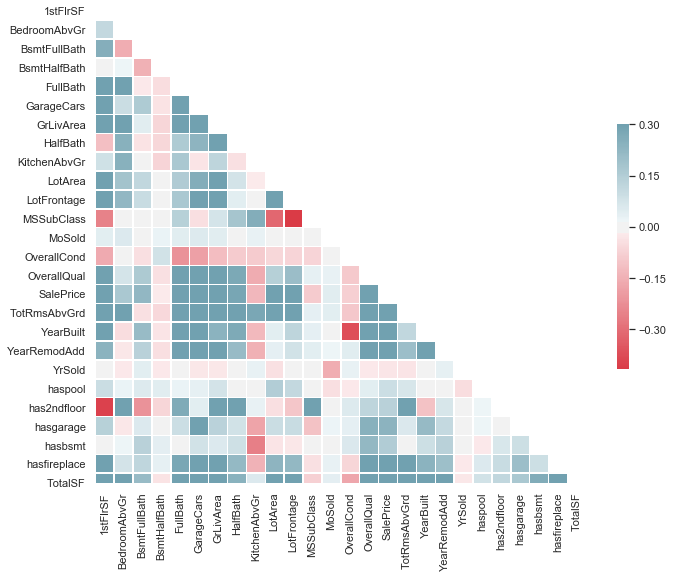

In [32]:
# Plot correlation between variables

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature Encoding

In [33]:
# One-hot encode categorical columns

onehot_columns = data[['MSZoning', 'Street', 'Utilities', 'LotConfig', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition', 'LandContour']]

onehot_df = pd.get_dummies(onehot_columns, columns = onehot_columns.columns)
onehot_df = onehot_df.drop(columns=['Street_Grvl', 'Utilities_NoSeWa', 'CentralAir_N'])

print(onehot_columns.shape)
print(onehot_df.shape)
onehot_df.head()

(2919, 19)
(2919, 108)


,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [34]:
import category_encoders as ce

# Binary encode categorical columns with more than 10 classes

binary_columns = data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass']]

encoder = ce.BinaryEncoder(cols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass'])
binary_df = encoder.fit_transform(binary_columns)

print(binary_df.shape)
binary_df.head()

(2919, 22)


,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [35]:
# Create a dictionary which contains mapping numbers for each ordinal category

dictionary = {
              'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 
              'Gtl': 3,'Mod': 2, 
              'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,'NA': 0, 
              'GLQ': 5, 'ALQ': 4, 'Rec': 4, 'BLQ': 3, 'LwQ': 2, 'Unf': 1,
              'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 4, 'Maj2': 3, 'Sal': 1, 'None':0,
              'Y': 3, 'P': 2, 'N': 1,
              'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1         
             }

label_enc_columns = ['LotShape', 'LandSlope', 'BsmtExposure',  'Functional', 'PavedDrive']

bmst_columns = ['BsmtFinType1', 'BsmtFinType2']

qual_cond_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                     'GarageQual', 'GarageCond', 'KitchenQual', 'HeatingQC']

In [36]:
# Replace the values with the corresponding map created

ordinal_df = data[label_enc_columns + bmst_columns + qual_cond_columns]
ordinal_replace_df = ordinal_df.copy()

ordinal_replace_df.replace(dictionary, inplace=True)
ordinal_replace_df['Functional'].replace({'Sev': 2}, inplace=True)
ordinal_replace_df['LandSlope'].replace({'Sev': 1}, inplace=True)

print(ordinal_replace_df.shape)
ordinal_replace_df.head()

(2919, 15)


,LotShape,LandSlope,BsmtExposure,Functional,PavedDrive,BsmtFinType1,BsmtFinType2,ExterQual,ExterCond,BsmtQual,BsmtCond,GarageQual,GarageCond,KitchenQual,HeatingQC
0,4,3,1,7,3,5,1,4,3,4,3,3,3,4,5
1,4,3,4,7,3,4,1,3,3,4,3,3,3,3,5
2,3,3,2,7,3,5,1,4,3,4,3,3,3,4,5
3,3,3,1,7,3,4,1,3,3,3,4,3,3,4,4
4,3,3,3,7,3,5,1,4,3,4,3,3,3,4,5


In [37]:
onehotordinal_replace_df = pd.get_dummies(ordinal_replace_df, columns = ordinal_replace_df.columns)
print(onehotordinal_replace_df.shape)
onehotordinal_replace_df.head()

(2919, 75)


,LotShape_1,LotShape_2,LotShape_3,LotShape_4,LandSlope_1,LandSlope_3,LandSlope_4,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,Functional_0,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,PavedDrive_1,PavedDrive_2,PavedDrive_3,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,ExterQual_2,ExterQual_3,ExterQual_4,ExterQual_5,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,ExterCond_5,BsmtQual_0,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,KitchenQual_0,KitchenQual_2,KitchenQual_3,KitchenQual_4,KitchenQual_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5
0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [38]:
from scipy.stats import boxcox

# Smooth skewness in continuous features

cont_columns = ['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage', 'TotalSF']

cont_df = data[cont_columns]

skew_features = data[cont_columns].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
   cont_df[i] = boxcox(cont_df[i]+1)[0]

print(skew_features)
print(cont_df.apply(lambda x: skew(x)).sort_values(ascending=False))
print('')
print(cont_df.shape)
cont_df.describe()

LotArea        3.752625
1stFlrSF       0.982695
GrLivArea      0.875484
TotalSF        0.816744
LotFrontage    0.640160
dtype: float64
LotArea        0.128354
LotFrontage    0.122919
TotalSF        0.025927
1stFlrSF       0.000054
GrLivArea     -0.000188
dtype: float64

(2919, 5)


,1stFlrSF,GrLivArea,LotArea,LotFrontage,TotalSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.830921,9.306600,39.952196,27.734282,40.456644
std,0.304684,0.516553,5.681717,6.232489,4.594235
min,5.695325,7.080057,22.035282,11.384175,18.791108
25%,6.615482,8.930077,37.610549,25.139122,37.416569
50%,6.816367,9.327635,40.314993,28.187545,40.343409
75%,7.050179,9.630926,42.755513,31.116144,43.451659
max,8.010527,10.946883,72.186261,60.949406,61.776362


### Create final dataframes

In [39]:
# Create final dataframe

drop = ['MSZoning', 'Street', 'Utilities', 'LotConfig', 'Condition1', 'Condition2','BldgType', 
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
        'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition', 'Neighborhood', 'Exterior1st', 
        'Exterior2nd', 'MSSubClass', 'LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
        'KitchenQual', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '1stFlrSF', 'GrLivArea',
        'LotArea', 'LotFrontage', 'TotalSF']

remaining_data = data.drop(columns=drop)

print(remaining_data.shape)
remaining_data.head()

(2919, 20)


,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,GarageCars,HalfBath,KitchenAbvGr,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,YearBuilt,YearRemodAdd,YrSold,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,3.0,1.0,0.0,2,2.0,1,1.0,2,5,7,208500.0,8.0,2003,2003,2008,0,1,1,1,0
1,3.0,0.0,1.0,2,2.0,0,1.0,5,8,6,181500.0,6.0,1976,1976,2007,0,0,1,1,1
2,3.0,1.0,0.0,2,2.0,1,1.0,9,5,7,223500.0,6.0,2001,2002,2008,0,1,1,1,1
3,3.0,1.0,0.0,1,3.0,0,1.0,2,5,7,140000.0,7.0,1915,1970,2006,0,1,1,1,1
4,4.0,1.0,0.0,2,3.0,1,1.0,12,5,8,250000.0,9.0,2000,2000,2008,0,1,1,1,1


In [40]:
df_final_ord = pd.concat([onehot_df, binary_df, ordinal_replace_df, cont_df, remaining_data], axis=1)
df_final_hot = pd.concat([onehot_df, binary_df, onehotordinal_replace_df, cont_df, remaining_data], axis=1)

print('Ordinal DF shape:', df_final_ord.shape)
print('OneHot DF shape:', df_final_hot.shape)

Ordinal DF shape: (2919, 170)
OneHot DF shape: (2919, 230)


In [41]:
# Split data into training and test set

train_data_ord = df_final_ord.loc[df_final_ord['SalePrice'].notnull()]
test_data_ord = df_final_ord.loc[df_final_ord['SalePrice'].isnull()]

train_data_hot = df_final_hot.loc[df_final_hot['SalePrice'].notnull()]
test_data_hot = df_final_hot.loc[df_final_hot['SalePrice'].isnull()]

print('Ordinal Train shape:', train_data_ord.shape)
print('Ordinal Test shape:', test_data_ord.shape)
print('')
print('OneHot Train shape:', train_data_hot.shape)
print('OneHot Test shape:', test_data_hot.shape)

Ordinal Train shape: (1460, 170)
Ordinal Test shape: (1459, 170)

OneHot Train shape: (1460, 230)
OneHot Test shape: (1459, 230)


### Target Variable

Skewness: 1.882876
Kurtosis: 6.536282


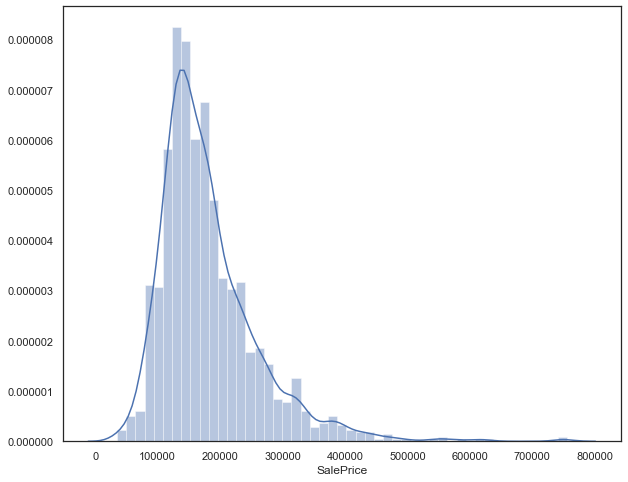

In [42]:
plt.figure(figsize =(10,8))
sns.distplot(train_data_ord['SalePrice'])

print("Skewness: %f" % train_data_ord['SalePrice'].skew())
print("Kurtosis: %f" % train_data_ord['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519

 mu = 12.02 and sigma = 0.40



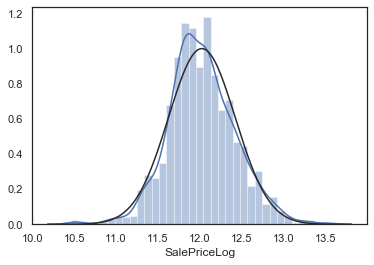

In [43]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data_ord["SalePriceLog"] = np.log1p(train_data_ord["SalePrice"])
train_data_hot["SalePriceLog"] = np.log1p(train_data_hot["SalePrice"])

#Check the new distribution 
sns.distplot(train_data_ord['SalePriceLog'], fit=norm)

print("Skewness: %f" % train_data_ord['SalePriceLog'].skew())
print("Kurtosis: %f" % train_data_ord['SalePriceLog'].kurt())

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_ord['SalePriceLog'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

### Feature selection 🔥

In [44]:
# Split data into training and test set

X_train_ord = train_data_ord.drop(columns=['SalePrice', 'SalePriceLog'])
y_train_ord = train_data_ord['SalePriceLog']

X_train_hot = train_data_hot.drop(columns=['SalePrice', 'SalePriceLog'])
y_train_hot = train_data_hot['SalePriceLog']

X_test_ord = test_data_ord.drop(columns=['SalePrice'])

X_test_hot = test_data_hot.drop(columns=['SalePrice'])

print('')
print('X_train_ord shape:', X_train_ord.shape)
print('y_train_ord shape:', y_train_ord.shape)
print('')
print('X_test_ord shape:', X_test_ord.shape)
#print('y_test_ord shape:', y_test_ord.shape)
print('')
print('X_train_hot shape:', X_train_hot.shape)
print('y_train_hot shape:', y_train_hot.shape)
print('')
print('X_test_hot shape:', X_test_hot.shape)
#print('y_test_hot shape:', y_test_hot.shape)


X_train_ord shape: (1460, 169)
y_train_ord shape: (1460,)

X_test_ord shape: (1459, 169)

X_train_hot shape: (1460, 229)
y_train_hot shape: (1460,)

X_test_hot shape: (1459, 229)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel_fit_ord = sel.fit(X_train_ord, y_train_ord)

selected_feat_ord = X_train_ord.columns[(sel.get_support())]

print(len(selected_feat_ord))
print(selected_feat_ord.sort_values())

12
Index(['1stFlrSF', 'CentralAir_Y', 'GarageCars', 'GrLivArea', 'KitchenQual',
       'LotArea', 'LotFrontage', 'OverallCond', 'OverallQual', 'TotalSF',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')


In [46]:
sel_fit_hot = sel.fit(X_train_hot, y_train_hot)
selected_feat_hot = X_train_hot.columns[(sel.get_support())]

print(len(selected_feat_hot))
print(selected_feat_hot.sort_values())

13
Index(['1stFlrSF', 'CentralAir_Y', 'GarageCars', 'GarageQual_3', 'GrLivArea',
       'LotArea', 'LotFrontage', 'MoSold', 'OverallCond', 'OverallQual',
       'TotalSF', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


### Finding best model

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Instantiate regression models 

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR', LinearRegression()))
    basedModels.append(('RIDGE', Ridge()))
    basedModels.append(('RIDGE CV', RidgeCV()))
    basedModels.append(('LASSO', Lasso()))
    basedModels.append(('LASSO CV', LassoCV()))
    basedModels.append(('LASSO LarsCV', LassoLarsCV()))
    basedModels.append(('ELASTIC NET', ElasticNet()))
    basedModels.append(('SVM', SVR()))
    basedModels.append(('RF', RandomForestRegressor()))
    basedModels.append(('XGB', xgb.XGBRegressor(objective ='reg:squarederror')))
    return basedModels

In [48]:
# Function 2: Let's define a function that will train each individual model described in GetBasedModel() function
from sklearn.model_selection import cross_val_score

def BasedModels(X_train, y_train, models):

    # Test options and evaluation metric
    num_folds = 10
    scoring = 'neg_root_mean_squared_error'

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = -cross_val_score(model, X_train, y_train, scoring=scoring, cv=kfold)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Root Mean Squared Error = %f (std = %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [49]:
models = GetBasedModel()
names,results_ord = BasedModels(X_train_ord, y_train_ord, models)
print('')
names,results_hot = BasedModels(X_train_hot, y_train_hot, models)

LR: Root Mean Squared Error = 29410314.352059 (std = 50431263.822990)
RIDGE: Root Mean Squared Error = 0.125022 (std = 0.017696)
RIDGE CV: Root Mean Squared Error = 0.123337 (std = 0.018084)
LASSO: Root Mean Squared Error = 0.288341 (std = 0.023662)
LASSO CV: Root Mean Squared Error = 0.138114 (std = 0.017415)
LASSO LarsCV: Root Mean Squared Error = 0.125262 (std = 0.016663)
ELASTIC NET: Root Mean Squared Error = 0.215486 (std = 0.015419)
SVM: Root Mean Squared Error = 0.342358 (std = 0.025736)
RF: Root Mean Squared Error = 0.141286 (std = 0.018356)
XGB: Root Mean Squared Error = 0.126509 (std = 0.018150)

LR: Root Mean Squared Error = 119560743.122083 (std = 156763706.944926)
RIDGE: Root Mean Squared Error = 0.126002 (std = 0.019121)
RIDGE CV: Root Mean Squared Error = 0.123154 (std = 0.019356)
LASSO: Root Mean Squared Error = 0.288341 (std = 0.023662)
LASSO CV: Root Mean Squared Error = 0.139632 (std = 0.016976)
LASSO LarsCV: Root Mean Squared Error = 0.123530 (std = 0.017793)
ELASTI

### Scaling data

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# We will define a function to apply any preprocessing method to the raw data

def GetScaledModel(nameOfScaler):
    """
    Function to define whether we want to apply any preprocessing method to the raw data.
    input:
    nameOfScale  = 'standard' (standardize) or 'minmax'
    """
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LinearRegression())])))
    pipelines.append((nameOfScaler+'RIDGE' , Pipeline([('Scaler', scaler),('RIDGE' , Ridge())])))
    pipelines.append((nameOfScaler+'LASSO', Pipeline([('Scaler', scaler),('LASSO', Lasso())])))
    pipelines.append((nameOfScaler+'LASSO CV' , Pipeline([('Scaler', scaler),('LASSO CV' , LassoCV())])))
    pipelines.append((nameOfScaler+'LASSO LarsCV' , Pipeline([('Scaler', scaler),('LASSO LarsCV' , LassoLarsCV())])))
    pipelines.append((nameOfScaler+'ELASTIC NET'  , Pipeline([('Scaler', scaler),('ELASTIC NET'  , ElasticNet())])  ))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVR())])))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestRegressor())])  ))
    pipelines.append((nameOfScaler+'XGB' , Pipeline([('Scaler', scaler),('XGB' , xgb.XGBRegressor(objective ='reg:squarederror'))])  ))

    return pipelines 

In [51]:
models_std_scaled = GetScaledModel('standard')
names_ss,results_ss_ord = BasedModels(X_train_ord, y_train_ord, models_std_scaled)
print('')
names_ss,results_ss_hot = BasedModels(X_train_hot, y_train_hot, models_std_scaled)

standardLR: Root Mean Squared Error = 588370166854.707275 (std = 663715009743.113403)
standardRIDGE: Root Mean Squared Error = 0.129414 (std = 0.017841)
standardLASSO: Root Mean Squared Error = 0.398637 (std = 0.027261)
standardLASSO CV: Root Mean Squared Error = 0.124922 (std = 0.016825)
standardLASSO LarsCV: Root Mean Squared Error = 0.125262 (std = 0.016663)
standardELASTIC NET: Root Mean Squared Error = 0.398637 (std = 0.027261)
standardSVM: Root Mean Squared Error = 0.178320 (std = 0.021987)
standardRF: Root Mean Squared Error = 0.139520 (std = 0.018835)
standardXGB: Root Mean Squared Error = 0.126514 (std = 0.018148)

standardLR: Root Mean Squared Error = 567588413106.039062 (std = 669276772914.681396)
standardRIDGE: Root Mean Squared Error = 0.131435 (std = 0.019956)
standardLASSO: Root Mean Squared Error = 0.398637 (std = 0.027261)
standardLASSO CV: Root Mean Squared Error = 0.123264 (std = 0.018000)
standardLASSO LarsCV: Root Mean Squared Error = 0.123530 (std = 0.017792)
stan

In [52]:
models_mm_scaled = GetScaledModel('minmax')
names_mm,results_mm_ord = BasedModels(X_train_ord, y_train_ord, models_mm_scaled)
print('')
names_mm,results_mm_hot = BasedModels(X_train_hot, y_train_hot, models_mm_scaled)

minmaxLR: Root Mean Squared Error = 85858030270.475433 (std = 84526659190.198013)
minmaxRIDGE: Root Mean Squared Error = 0.124679 (std = 0.016052)
minmaxLASSO: Root Mean Squared Error = 0.398637 (std = 0.027261)
minmaxLASSO CV: Root Mean Squared Error = 0.124052 (std = 0.018008)
minmaxLASSO LarsCV: Root Mean Squared Error = 0.125262 (std = 0.016663)
minmaxELASTIC NET: Root Mean Squared Error = 0.398637 (std = 0.027261)
minmaxSVM: Root Mean Squared Error = 0.129686 (std = 0.016152)
minmaxRF: Root Mean Squared Error = 0.139987 (std = 0.018911)
minmaxXGB: Root Mean Squared Error = 0.126509 (std = 0.018150)

minmaxLR: Root Mean Squared Error = 55283297331.326904 (std = 67189942407.356407)
minmaxRIDGE: Root Mean Squared Error = 0.125773 (std = 0.017640)
minmaxLASSO: Root Mean Squared Error = 0.398637 (std = 0.027261)
minmaxLASSO CV: Root Mean Squared Error = 0.123042 (std = 0.018720)
minmaxLASSO LarsCV: Root Mean Squared Error = 0.123530 (std = 0.017793)
minmaxELASTIC NET: Root Mean Squared

### Validation functions

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

# Define validation functions

def print_scoresClassification(model, X_train, y_train, X_test, y_test, train=True):
    
    scoring="neg_mean_squared_error"
    
    if train:
        scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring=scoring))
        ypred_train = model.predict(X_train)
        CVmean_train = scores.mean()
        R2_train = r2_score(y_train, ypred_train)
        rmsle_train = np.sqrt(mean_squared_error(y_train, ypred_train))
    
        print("Train Results:\n===========================================")
        print(f"CV -CV mean : {CVmean_train:.4f}\n")
        print(f"CV -R2: {R2_train:.4f}\n")
        print(f"CV -Recall: {rmsle_train:.4f}\n")
        
    elif train==False:
        scores = np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring=scoring))
        ypred_test = model.predict(X_test)
        CVmean_test = scores.mean()
        R2_test = r2_score(y_test, ypred_test)
        rmsle_test = np.sqrt(mean_squared_error(y_test, ypred_test))
    
        print("Test Results:\n===========================================")
        print(f"CV -CV mean : {CVmean_test:.4f}\n")
        print(f"CV -R2: {R2_test:.4f}\n")
        print(f"CV -RMSE: {rmsle_test:.4f}\n")

In [54]:
def MetricsClas(models, X_train, y_train, X_test, y_test):
    for name, model in models:
        print('-*-'*25)
        print('Assessment of ', str(name), '\n')
        model_fit = model.fit(X_train, y_train)
        print_scoresClassification (model_fit, X_train, y_train, X_test, y_test, train=True)
        print_scoresClassification (model_fit, X_train, y_train, X_test, y_test, train=False)

In [55]:
def ScoreDataFrame(names,results):
    """
    A function to append the results of the different models
    assessed and put them together in a DF

    """
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    
    return scoreDataFrame

In [56]:
Base_model_ord = ScoreDataFrame(names,results_ord)
Base_model_hot = ScoreDataFrame(names,results_hot)
SS_model_ord = ScoreDataFrame(names_ss,results_ss_ord)
SS_model_hot = ScoreDataFrame(names_ss,results_ss_hot)
MM_model_ord = ScoreDataFrame(names_mm,results_mm_ord)
MM_model_hot = ScoreDataFrame(names_mm,results_mm_hot)

scores_df = pd.concat([Base_model_ord, Base_model_hot, SS_model_ord, SS_model_hot, MM_model_ord, MM_model_hot], axis = 1, ignore_index=True, names = names)
scores_df = scores_df.drop(columns=[2,4,6,8,10]).set_index(0)
scores_df.columns = ['Base_model_ord', 'Base_model_hot', 'SS_model_ord', 'SS_model_hot', 'MM_model_ord', 'MM_model_hot']
scores_df

,Base_model_ord,Base_model_hot,SS_model_ord,SS_model_hot,MM_model_ord,MM_model_hot
0,,,,,,
LR,2.941031e+07,1.195607e+08,5.883702e+11,5.675884e+11,8.585803e+10,5.528330e+10
RIDGE,1.250000e-01,1.260000e-01,1.294000e-01,1.314000e-01,1.247000e-01,1.258000e-01
RIDGE CV,1.233000e-01,1.232000e-01,3.986000e-01,3.986000e-01,3.986000e-01,3.986000e-01
LASSO,2.883000e-01,2.883000e-01,1.249000e-01,1.233000e-01,1.241000e-01,1.230000e-01
LASSO CV,1.381000e-01,1.396000e-01,1.253000e-01,1.235000e-01,1.253000e-01,1.235000e-01
LASSO LarsCV,1.253000e-01,1.235000e-01,3.986000e-01,3.986000e-01,3.986000e-01,3.986000e-01
ELASTIC NET,2.155000e-01,2.155000e-01,1.783000e-01,1.847000e-01,1.297000e-01,1.366000e-01
SVM,3.424000e-01,3.427000e-01,1.395000e-01,1.406000e-01,1.400000e-01,1.414000e-01
RF,1.413000e-01,1.409000e-01,1.265000e-01,1.267000e-01,1.265000e-01,1.267000e-01


In [57]:
from sklearn.linear_model import Lasso

def lasso_regression(X_train, X_test, y_train, alpha):
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_test)
    return y_pred

In [58]:
predictions = lasso_regression(X_train_hot, X_test_hot, y_train_hot, 1)
predictions_final = np.expm1(predictions)
predictions_final

array([166716.72551645, 166716.72551645, 166716.72551645, ...,
       166716.72551645, 166716.72551645, 166716.72551645])

In [60]:
predictions

array([12.02405739, 12.02405739, 12.02405739, ..., 12.02405739,
       12.02405739, 12.02405739])

In [59]:
my_submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions_final})
my_submission.to_csv('submission.csv', index=False)